# Problem Statement  <a id='Problem Statement'></a>

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

Categorise the countries using some socio-economic and health factors that determine the overall development of the country. Suggest the countries which the CEO needs to focus on the most

# 2. Table of Content  <a id='Table of Contents'></a>

- <a href='#Problem Statement'>1. Problem Statement</a>


- <a href='#Table of Contents'>2. Table of Contents</a>

- <a href='#Data Dictionary'>3. Data Dictionary</a>

- <a href='#Data Imports'>3. Library Imports</a>

- <a href='#Load Data'>4. Load Data</a>
    - <a href='#Check Missingness'>4.1 Check for missing values and duplicates</a>

- <a href='#Data Preparation'>5. Data Preparation</a>
    - <a href='#Treat Columns'>5.1 Treat columns and Data Conversion</a>

- <a href='#Outlier Detection'>6. Outlier Detection</a>   
    - <a href='#Function Boxplot'>6.1 Function to create boxplot</a>
    - <a href='#Create Boxplot'>6.2 Create boxplot to check the outliers</a>
    - <a href='#Check Distribution'>6.3 Plot the distribution</a>
    - <a href='#Treat Outliers'>6.4 Treat Outliers</a>
    
- <a href='#Feature Scaling'>7. Feature Scaling</a>   

- <a href='#Check Correlation'>8. Check correlation</a>
    - <a href='#Create Pairplot for correlation'>8.1 Create pairplot</a>
    - <a href='#Create Heatmap'>8.2 Plot heatmap</a>
    
- <a href='#PCA'>9. PCA</a>
    - <a href='#Scree Plot'>9.1 Scree Plot</a>
    - <a href='#Scatter Plot Principal Component'>9.2 Scatter plot to plot first two Principal components explaining all features</a>
    - <a href='#Four PCA'>9.3 Fit and transform data using 4 Principal components</a>
    - <a href='#Heatmap PCA'>9.4 Heatmap of Principal Components</a>
    
- <a href='#Hopkins Statistics'>10. Hopkins Statistics</a>
    
- <a href='#Clustering'>11. Clustering</a>
    - <a href='#Clustering Approach'>11.1 Clustering Approach</a>
    - <a href='#Hierarchical Clustering'>11.2 Modelling - Hierarchical Clustering</a>
    - <a href='#Hierarchical PCA Clustering'>11.3 Scatterplot of Principal Components and Hierarchical Cluster Ids</a>
    - <a href='#Hierarchical Scatterplot'>11.4 Scatterplot of Original features and Hierarchical Cluster Ids</a>
    - <a href='#KMeans Clustering'>11.5 Modelling - KMeans Clustering</a>
    - <a href='#SSD Elbow Curve'>11.6 Silhouette Score and Elbow-Curve to determine optimal clusters</a>
    - <a href='#K Means with Optimal k'>11.7 K Means with Optimal number of k clusters</a>
    - <a href='#KMeans PCA Clustering'>11.8 Scatterplot of Principal Components and K-Means Cluster Ids</a>
    - <a href='#KMeans Clustering Scatterplot Original Features'>11.9 Scatterplot of Original features and K-Means Cluster Ids</a>
    
- <a href='#List Of Countries'>12. List of countries that need more focus</a>

- <a href='#Conclusion and Recommendations'>13. Conclusion and Recommendations</a>

<h1>3. Data Dictionary of Countries Dataset</h1>  <a id='Data Dictionary'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

|Feature|Type|Description|
|---|---|---|
|country|object|Name of the country|
|child_mort|float64|Death of children under 5 years of age per 1000 live births|
|exports|float64|Exports of goods and services. Given as %age of the Total GDP|
|health|float64|Total health spending as %age of Total GDP|
|imports|float64|Imports of goods and services. Given as %age of the Total GDP|
|income|float64|Net income per person|
|inflation|float64|The measurement of the annual growth rate of the Total GDP|
|life_expec|float64|The average number of years a new born child would live if the current mortality patterns are to remain the same|
|total_fer|float64|The number of children that would be born to each woman if the current age-fertility rates remain the same|
|gdpp|int64|The GDP per capita. Calculated as the Total GDP divided by the total population|

# 3. Library Imports  <a id='Data Imports'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy.stats import norm
from scipy.stats import stats

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

plt.style.use('ggplot')

In [21]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

# 4. Reading and understanding data<a id='Load Data'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [22]:
country_df = pd.read_csv('./dataset/Country-data.csv')
country_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [23]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [24]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Observations from dataframe info
- From above cell it can be seen that there are no null columns
- There are total 167 rows and 10 columns

## 4.1 Check for missing values and duplicates <a id='Check Missingness'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [25]:
pd.DataFrame([[country_df.shape],
            [country_df.isnull().sum().sum()],
             [country_df.duplicated().sum()]],
            columns = ['Application Data Set'],
            index = ['Shape', 'Missingness', 'Duplicates'])

Application Data Set
Shape                  (167, 10)
Missingness                    0
Duplicates                     0

## Observations from above cell
- There are no missing values
- There are no duplicate values

In [26]:
country_df['country'].value_counts()

Kyrgyz Republic                   1
Sweden                            1
Croatia                           1
Iran                              1
Serbia                            1
Sierra Leone                      1
Finland                           1
Uganda                            1
Bosnia and Herzegovina            1
Myanmar                           1
Grenada                           1
Timor-Leste                       1
Turkey                            1
Malawi                            1
Rwanda                            1
Ghana                             1
Indonesia                         1
Namibia                           1
Seychelles                        1
Micronesia, Fed. Sts.             1
Zambia                            1
Cameroon                          1
Bulgaria                          1
Burkina Faso                      1
Colombia                          1
Suriname                          1
Libya                             1
Germany                     

#### Observations from above 
- There is one row per country in the dataframe

# 5. Data Preparation<a id='Data Preparation'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## 5.1 Treat columns and Data Conversion<a id='Treat Columns'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

### As per data dictionary
- exports	- Exports of goods and services. Given as %age of the Total GDP
- health	- Total health spending as %age of Total GDP
- imports	- Imports of goods and services. Given as %age of the Total GDP
- So we need to treat these three columns before processding

In [27]:
country_df['exports'] = country_df['exports']*country_df['gdpp']/100
country_df['health'] = country_df['health']*country_df['gdpp']/100
country_df['imports'] = country_df['imports']*country_df['gdpp']/100
country_df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

# 6. Outlier Detection<a id='Outlier Detection'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## 6.1 Function to create boxplot<a id='Function Boxplot'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [28]:
def plot_boxplot(df,cols_list):
    plt.figure(figsize=(14,10))
    for i,col in enumerate(cols_list):
        plt.subplot(3,3,i+1)
        plt.title('boxplot for {0}'.format(col),color='blue')
        sns.boxplot(df[col]);
        plt.tight_layout(pad=1.0)

## 6.2 Lets create boxplot to check the outliers<a id='Create Boxplot'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [29]:
object_cols = [col for col in country_df.select_dtypes(include=np.object).columns]
numerical_cols = [col for col in country_df.select_dtypes(include=np.number).columns]

print('Categorical Columns: \n{0}\n'.format(object_cols))
print('Numerical Columns: \n{0}'.format(numerical_cols))
            

Categorical Columns: 
['country']

Numerical Columns: 
['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


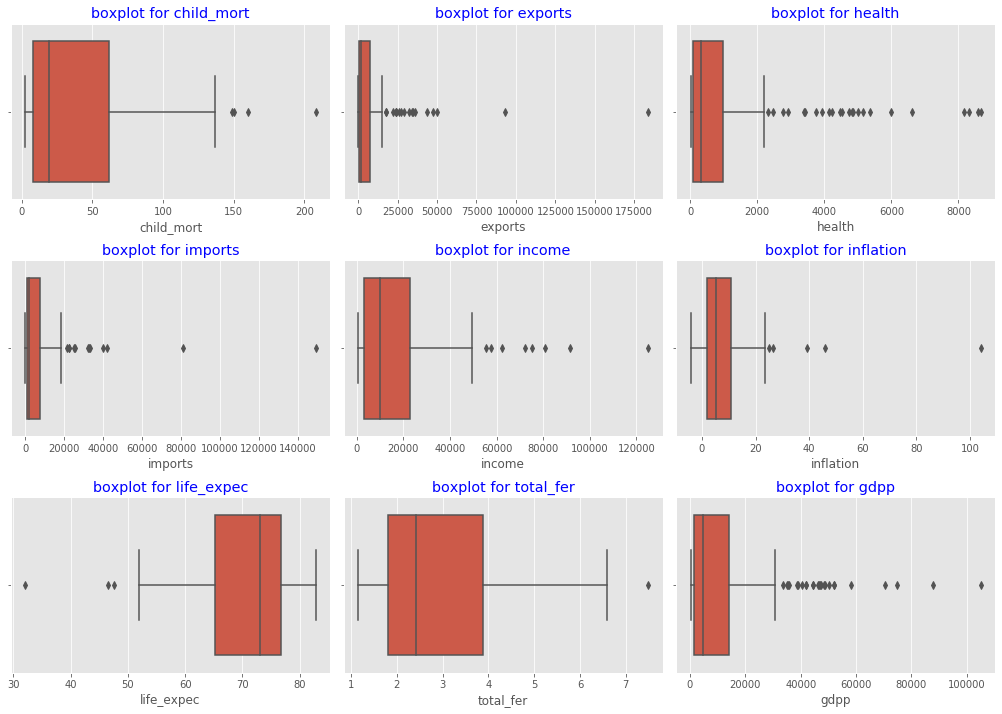

In [30]:
plot_boxplot(country_df,numerical_cols)

## Observations from above plot
- There are outliers in features - child_mort, exports, imports, income, inflation, gdpp
- standard deviation in income and gdpp is very high. This means there is lot of variation in data

## Function to create histograms

In [31]:
def subplot_histograms(dist_df, list_of_columns, cols = 2):
    nrows = int(np.ceil(len(list_of_columns)/cols)) # Makes sure you have enough rows
    
    #Scales the height of the fig to accomodate a long list of features    
    fig, ax = plt.subplots(nrows=nrows, ncols=cols, figsize=(25, len(list_of_columns)*(10/cols)),squeeze=False) 
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        try:
            sns.distplot(dist_df[column], ax=ax[i],fit=norm, kde=True) 
            mean_val = dist_df[column].mean()
            skewness = dist_df[column].skew()
            #runs D’Agostino's normality test to print on graph
            #The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, 
            #to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.
            #Skew is a quantification of how much a distribution is pushed left or right, 
            #a measure of asymmetry in the distribution.
            #Kurtosis quantifies how much of the distribution is in the tail. 
            #It is a simple and commonly used statistical test for normality.
            
            normality_test = stats.normaltest(dist_df[column]).pvalue < 0.05
            ax[i].set_title("Histogram for {}".format(list_of_columns[i]),color='blue')
            ax[i].set_xlabel(list_of_columns[i]) 
            ax[i].axvline(x = mean_val, label = "mean", color = "darkred").set_linestyle("--")
            ax[i].text(0.75, 0.83, "Normal: {}".format(not normality_test), ha="left", va="top", transform=ax[i].transAxes, fontsize=12)
            ax[i].text(0.75, 0.77, "Skewness: {}".format(round(skewness,2)), ha="left", va="top", transform=ax[i].transAxes, fontsize=12)
            ax[i].legend()
        except:
            ax[i].text(0.75, 0.5, "Could not plot {}".format(column), ha="left", va="top", transform=ax[i].transAxes, fontsize=12)

## 6.3 Lets plot the distribution<a id='Check Distribution'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

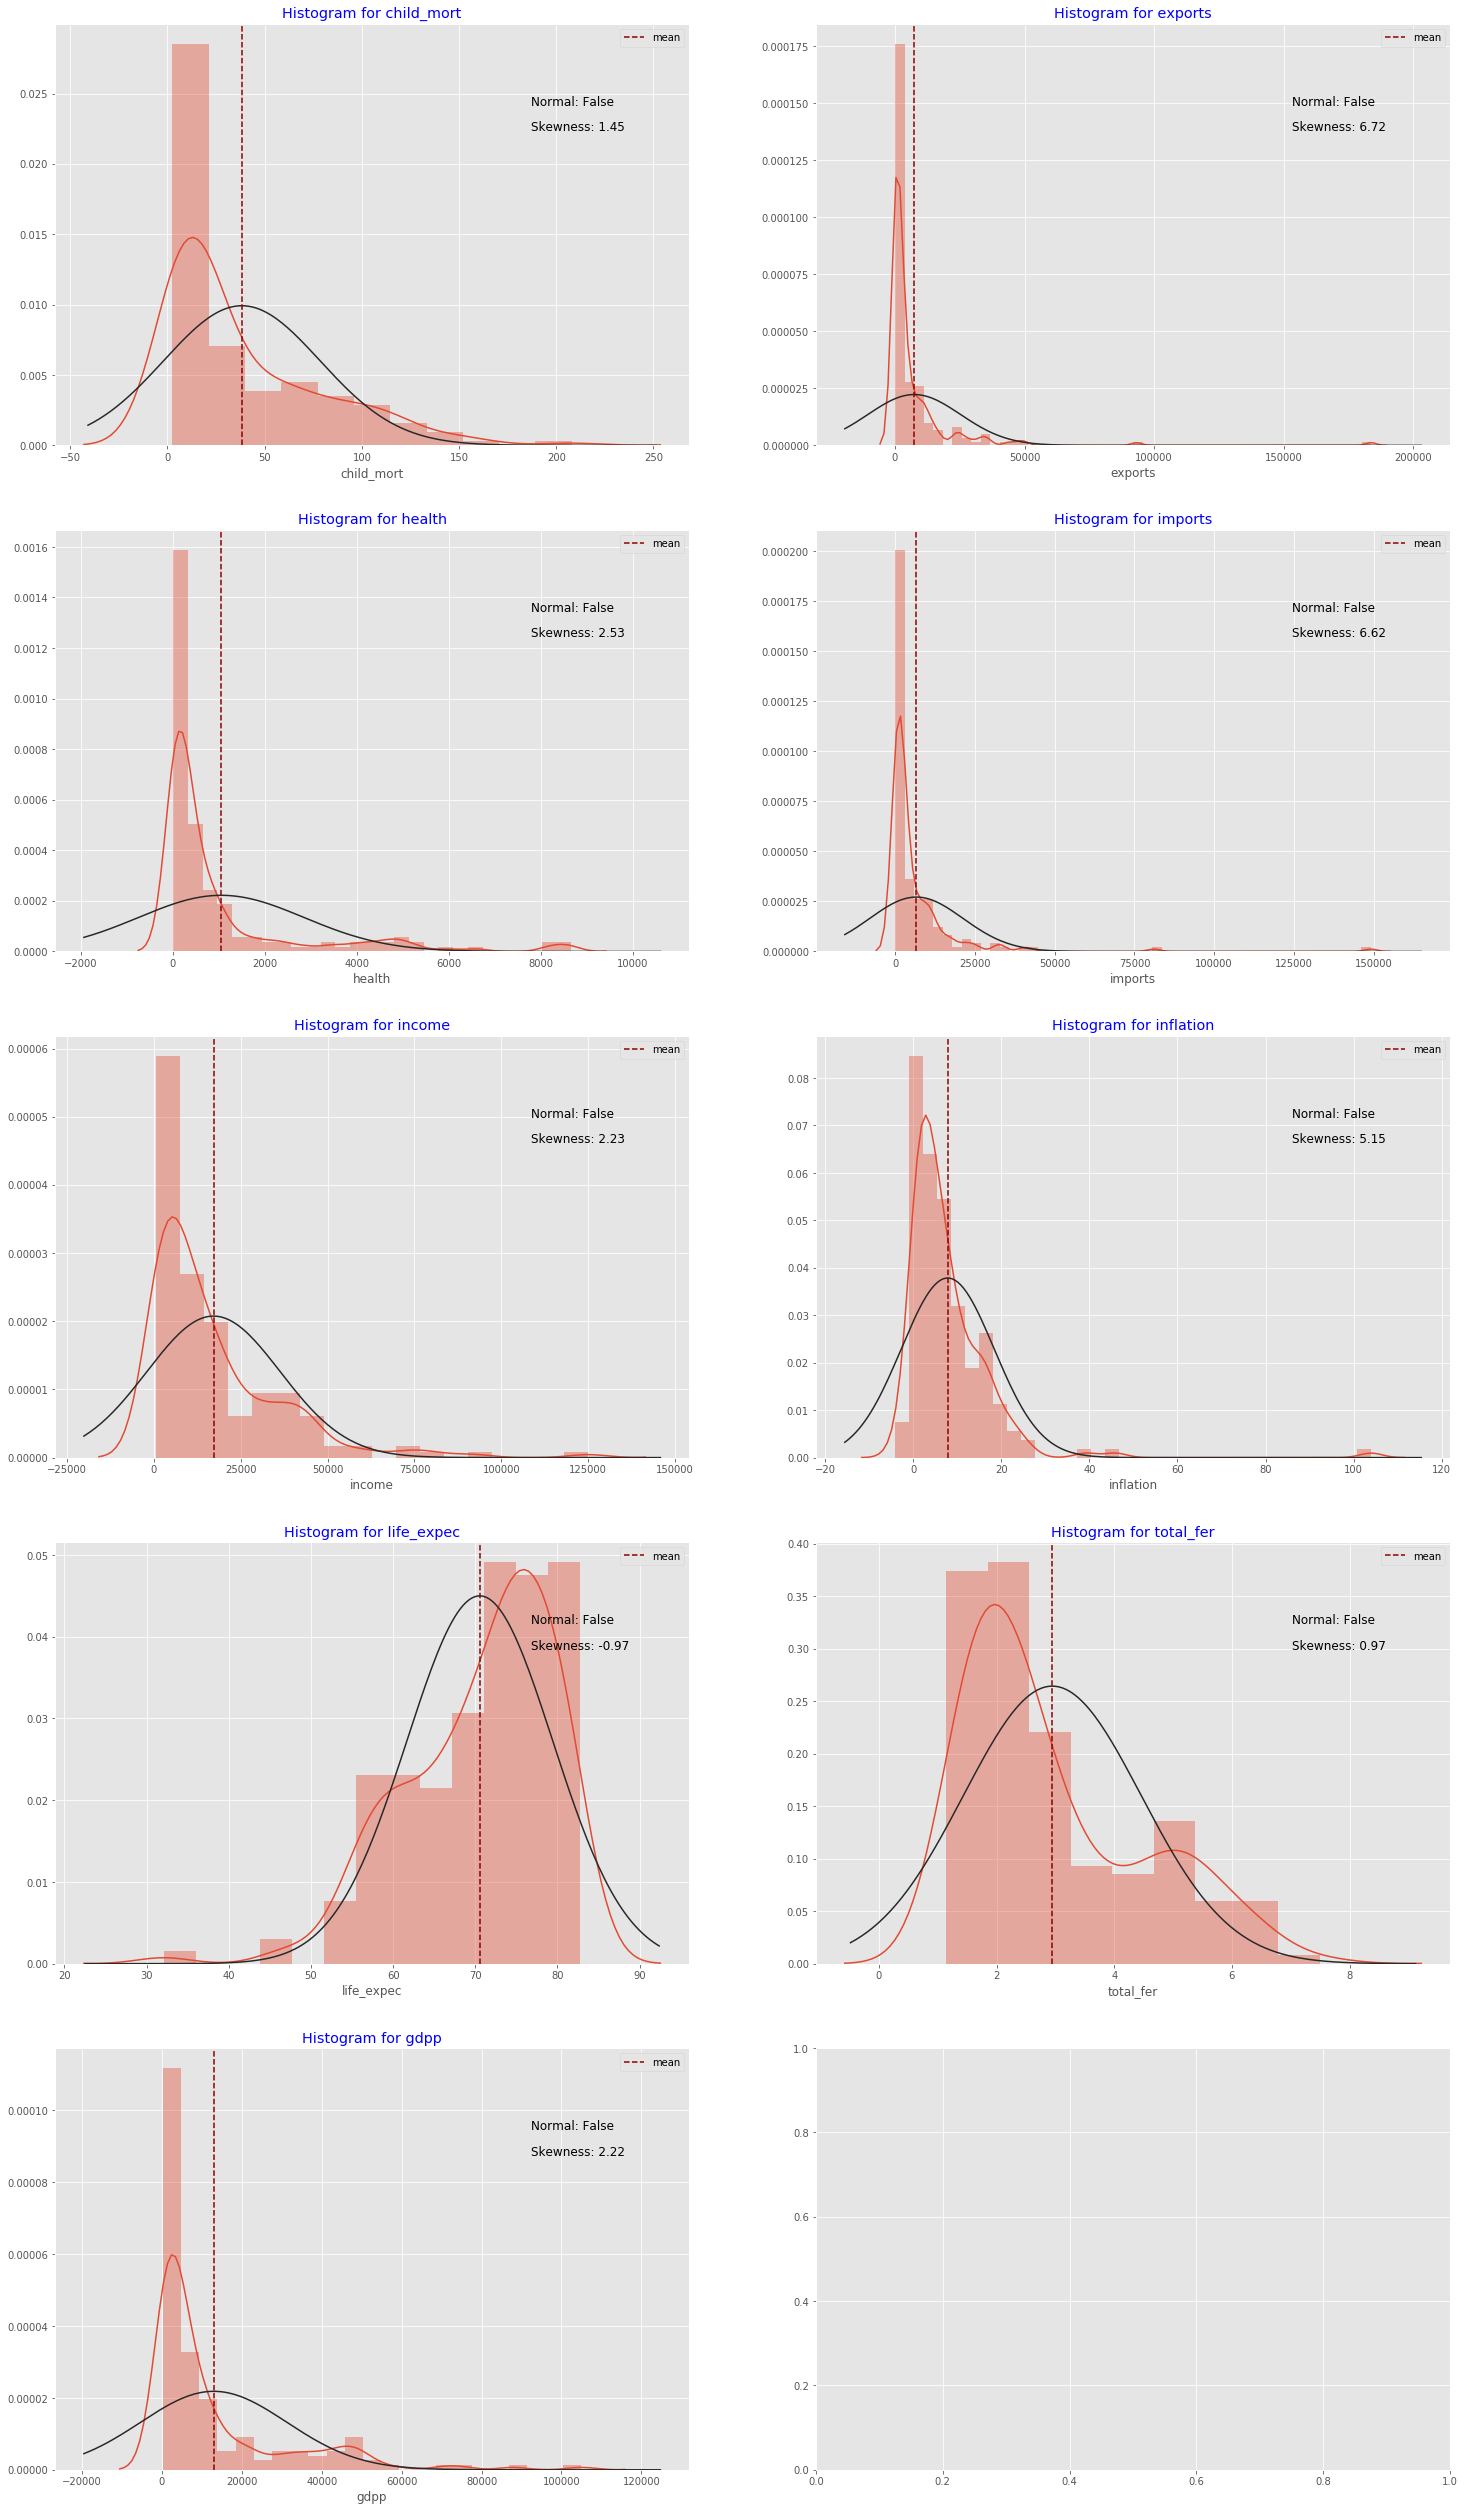

In [32]:
subplot_histograms(country_df, numerical_cols, cols = 2)

## Observations from above plot
- None of the distribution is normal
- child_mort is slightly right-skewed. Most of the observations are within the range of 0-20, while there are many observations within the range of 30-150
- distribution plot of feature exports is also right skewed with skewness of 6.72. Maximum observations within the range of 1-1800. There are many observations within the range of 1800-8000. There are number of observations between 17000-32000 with few outliers in 64000-190000
- For feature health, there are many observations within the range of 12-320. There are couple of observations within the range of 320-1000. Some observations are within the range of 1000-4000 with few outlier in the range of 8000-9000
- For imports, the distribution is again right skewed with skewness of 6.62, maximum observations are within the range of 0-3000. Some observations re within the range of 7000-16000 and few outliers in the range of 24000-150000
- For income, the data is right skewed with skweness of 2.23. Maximum observations within the range of 600-10000. While there are few observations with income within the range of 20000-60000 with few outliers between 70000 - 125000
- Inflation is highly rightly skewed with skewness of 5.15. Maximum observations having inflation within the range of 0-5.There are few observations having negative inflation as well with value around -4. There are some observations with inflation in the range of 10-20 and there are some outliers around 100-105.
- Life expectancy is left skewed. While many observations are within the range of 70-80, there are quite significant number of observations within the range of 52-70. There are also some observations with life expectancy as low as 32
- Total fertility is right skewed with maximum observations having fertility rate within the range of 1-4. There are couple of observations with total fertility as high as between 5-7
- GDP per capita is right skewed with maximum observations within the range of 0-5000. There are couple of observations with gdp per capita within the range of 15000-60000. There are few outliers as well where GDP per capita is within the range of 79000-105000

## Check for outliers using various percentiles

In [33]:
country_df.describe([0,0.05,0.25,0.5,0.75,0.9,0.95,0.99])

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.733204    6588.352108   17144.688623   
std     40.328931   17973.885795  1801.408906   14710.810418   19278.067698   
min      2.600000       1.076920    12.821200       0.651092     609.000000   
0%       2.600000       1.076920    12.821200       0.651092     609.000000   
5%       3.460000      70.468800    26.715920     169.281000    1213.000000   
25%      8.250000     447.140000    78.535500     640.215000    3355.000000   
50%     19.300000    1777.440000   321.886000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
90%    100.220000   17760.600000  3825.416000   15034.280000   41220.000000   
95%    116.000000   31385.100000  4966.701000   24241.560000   48290.000000   
99%    153.400000   64794.260000  8410.330400   55371.390000   84374.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
0%      -4.210000   32.100000    1.150000     231.000000  
5%       0.183400   55.780000    1.390000     465.900000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
90%     16.640000   80.400000    5.322000   41840.000000  
95%     20.870000   81.400000    5.861000   48610.000000  
99%     41.478000   82.370000    6.563600   79088.000000  
max    104.000000   82.800000    7.490000  105000.000000

## 6.4 Treat Outliers<a id='Treat Outliers'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

### Lets check for Interquartile range and outliers

In [34]:
Q1 = country_df.quantile(0.01)
Q4 = country_df.quantile(0.99)
#Interquartile range
IQR = Q4-Q1
print(IQR)

child_mort      150.600000
exports       64772.016284
health         8393.321038
imports       55266.480360
income        83631.760000
inflation        43.826800
life_expec       35.210000
total_fer         5.320400
gdpp          78756.380000
dtype: float64


In [35]:
country_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### Lets drop the outliers that are in 1st and 99th percentile

In [36]:
print(country_df.shape)
original_rows = country_df.shape[0]
col_list = ['child_mort', 'exports', 'health', 'imports', 'income',
            'inflation', 'life_expec', 'total_fer', 'gdpp']
for col in col_list:
    q1 = country_df[col].quantile(0.01)
    q4 = country_df[col].quantile(0.99)
    country_df = country_df[(country_df[col]>=q1)&(country_df[col]<=q4)]
print(country_df.shape)
remaining_rows = country_df.shape[0]
print('Percentage of data retained after removing outliers: {0}%'.format(
    round((remaining_rows/original_rows)*100),2))

(167, 10)
(132, 10)
Percentage of data retained after removing outliers: 79%


# 7. Feature Scaling<a id='Feature Scaling'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [37]:
sc = StandardScaler()
country_sc_df = country_df.copy()
country_sc_df[numerical_cols] = sc.fit_transform(country_df[numerical_cols])
country_sc_df

country  child_mort   exports    health   imports  \
0                       Afghanistan    1.770345 -0.675021 -0.596723 -0.705881   
1                           Albania   -0.526104 -0.513076 -0.413933 -0.414044   
2                           Algeria   -0.192245 -0.428761 -0.480191 -0.512579   
3                            Angola    2.668956 -0.356466 -0.549251 -0.493464   
4               Antigua and Barbuda   -0.722675  0.141572 -0.035564  0.458067   
5                         Argentina   -0.591628 -0.393983  0.044224 -0.471044   
6                           Armenia   -0.479302 -0.583720 -0.516026 -0.502811   
8                           Austria   -0.909886  2.891737  3.542414  3.013703   
9                        Azerbaijan    0.179056 -0.212049 -0.352864 -0.544718   
10                          Bahamas   -0.613469  0.772921  1.156362  1.305371   
11                          Bahrain   -0.775718  1.454418  0.201545  1.020202   
12                       Bangladesh    0.497314 -0.665218 -0.609047 -0.719815   
13                         Barbados   -0.600989  0.255836  0.400862  0.559773   
14                          Belarus   -0.872444 -0.222703 -0.356997 -0.094999   
16                           Belize   -0.457460 -0.307924 -0.448080 -0.328854   
17                            Benin    2.419342 -0.656432 -0.605491 -0.700230   
18                           Bhutan    0.288262 -0.545572 -0.538934 -0.488952   
19                          Bolivia    0.409949 -0.562026 -0.553112 -0.633596   
20           Bosnia and Herzegovina   -0.828761 -0.479796 -0.216714 -0.350760   
21                         Botswana    0.594039 -0.271858 -0.204306 -0.201000   
22                           Brazil   -0.426259 -0.505171  0.185634 -0.525806   
24                         Bulgaria   -0.707075 -0.173036 -0.250527 -0.139317   
25                     Burkina Faso    2.575351 -0.666834 -0.599281 -0.718984   
27                         Cambodia    0.341305 -0.620055 -0.594517 -0.669075   
28                         Cameroon    2.325737 -0.640026 -0.576270 -0.688197   
29                           Canada   -0.869324  1.366291  3.701926  1.717765   
30                       Cape Verde   -0.217207 -0.522411 -0.521123 -0.404340   
33                            Chile   -0.772598  0.039388  0.199967 -0.070109   
34                            China   -0.554186 -0.505040 -0.443621 -0.574636   
35                         Colombia   -0.463701 -0.535579 -0.246914 -0.560888   
36                          Comoros    1.707942 -0.664385 -0.602576 -0.680836   
38                      Congo, Rep.    0.949739 -0.336770 -0.576107 -0.496080   
39                       Costa Rica   -0.725796 -0.278723  0.092353 -0.266021   
40                    Cote d'Ivoire    2.419342 -0.591512 -0.578327 -0.658910   
41                          Croatia   -0.872444  0.070993  0.216760  0.115418   
42                           Cyprus   -0.931727  1.614165  0.856718  2.223778   
43                   Czech Republic   -0.937968  1.258506  0.631427  1.341980   
45               Dominican Republic    0.029287 -0.499413 -0.356425 -0.443051   
46                          Ecuador   -0.260889 -0.490053 -0.326815 -0.494224   
47                            Egypt   -0.136082 -0.600950 -0.532625 -0.631505   
48                      El Salvador   -0.444980 -0.563728 -0.463506 -0.513770   
49                Equatorial Guinea    2.419342  1.496810 -0.010958  0.942286   
51                          Estonia   -0.903646  0.945966  0.081498  0.935290   
52                             Fiji   -0.292091 -0.369763 -0.487141 -0.356226   
53                          Finland   -0.950448  1.973420  2.714034  2.151433   
54                           France   -0.913006  0.933515  3.277423  1.166553   
55                            Gabon    0.943499  0.066944 -0.382908 -0.470079   
56                           Gambia    1.461448 -0.663364 -0.604763 -0.707277   
57                          Georgia   -0.529224 -0.529301 -

# 8. Check correlation<a id='Check Correlation'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## 8.1 Lets create pairplot<a id='Create Pairplot for correlation'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

<Figure size 2880x2880 with 0 Axes>

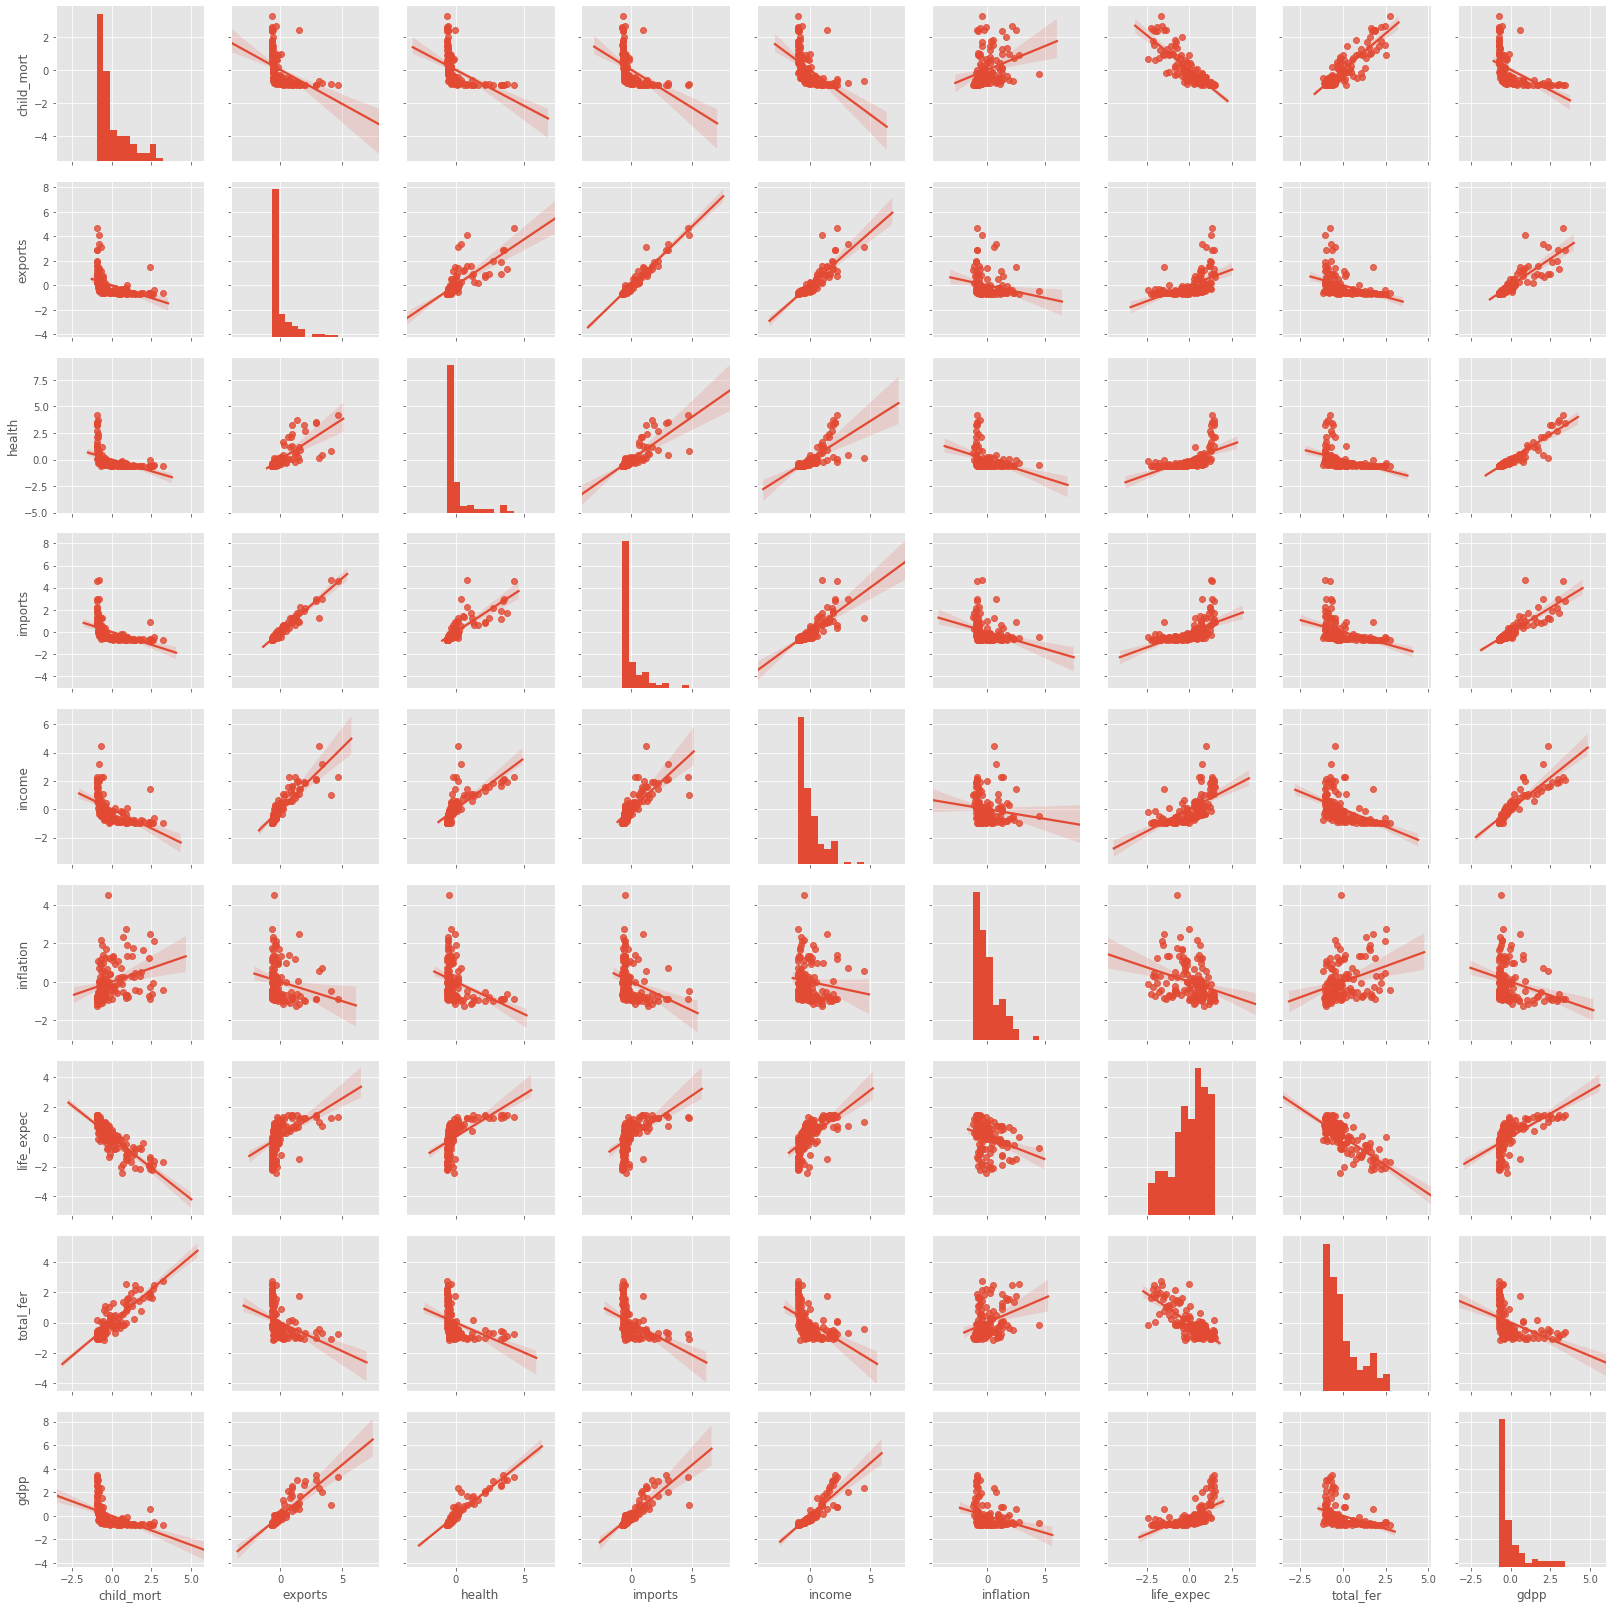

In [38]:
plt.figure(figsize=(40,40));
sns.pairplot(country_sc_df,kind='reg');#,height=4,aspect=2);

## Observations from above plot, there seems to be:
- Strong negative relationship between child_mort and life_expec. Also there seems to be strong positive relationship between child_mort and total_fer. There also seems to be some relationship between child_mort & health, and child_mort & inflation
- Strong positive relationship between exports and imports. Also there seems to be some negative relationship between exports and inflation
- Positive relationship between inflation and (child_mort, total_fer) and negative relationship between inflation and (exports, health, imports, income, life_expec, gdpp)
- Negative relationship between life_expec and (child_mort, inflation, total_fer). Positive reltionship between life_expec and (exports, health, imports, income and gdpp)

## 8.2 Lets further plot heatmap and check the correlation<a id='Create Heatmap'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

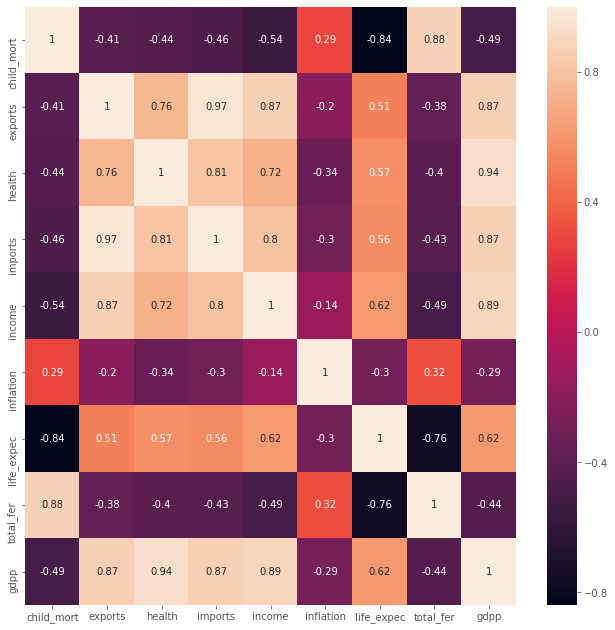

In [39]:
plt.figure(figsize=(11,11))
sns.heatmap(country_sc_df.corr(),annot=True);

In [40]:
country_corr = country_sc_df.corr()
country_corr.style.apply(lambda x: ["background: lightblue" if abs(v) > 0.5 else "" for v in x], axis = 1)


## Observations from above plot
- There is a very high negative correlation between child_mort & income and child_mort & life_expec. Also there is strong correlation between child_mort & total_fer
- Features exports and imports are highly positively correlated. There is strong positive correlation between exports and income as well
- Income is negatively correlated with child_mort and total_fer. This means as income decreases child mortality goes up. Also there is positive correlation between income and life_expec, this means as the income increases the life expectancy increases. Also as the income increases the gdpp increases because of the positive correlation between the two
- Life_expec has strong negative correlation with child_mort and total_fer and high positive correlation with income and gdpp

# 9. PCA<a id='PCA'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

### Lets try to fit the scaled dataframe and check numebr of PCA components wrt explained variance ratio

In [41]:
pca = PCA(svd_solver='randomized',random_state=42)
country_pca_df = pca.fit(country_sc_df[numerical_cols].values)

In [42]:
pca.explained_variance_ratio_

array([0.63880069, 0.16659298, 0.1001796 , 0.03658733, 0.02264233,
       0.02132983, 0.01137607, 0.00146684, 0.00102432])

## 9.1 Scree Plot<a id='Scree Plot'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

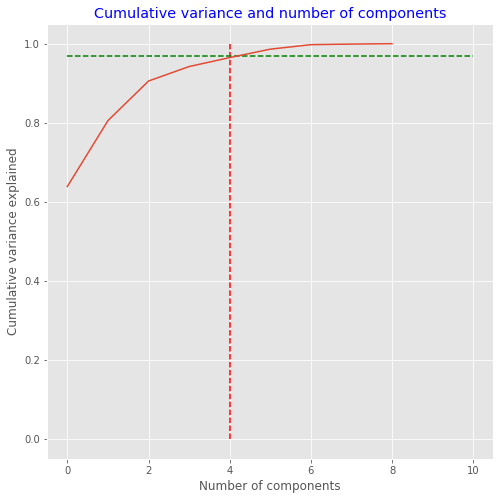

In [43]:
plt.figure(figsize=(8,8));
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.ylabel('Cumulative variance explained')
plt.xlabel('Number of components')
plt.title('Cumulative variance and number of components',color='blue')
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.97, xmax=10, xmin=0, colors="g", linestyles="--");

## Observations from above plot
- 4 PCA components explain 97% of the variance
- So lets fit and transform scaled data using 4 PCA components

## Choosing first 4 pricipal components based on above plot

In [44]:
country_pca = pd.DataFrame({'Feature':numerical_cols,
                            'PC1':pca.components_[0],
                            'PC2':pca.components_[1], 
                            'PC3':pca.components_[2], 
                            'PC4':pca.components_[3]})
country_pca

Feature       PC1       PC2       PC3       PC4
0  child_mort -0.305341  0.497276 -0.177483 -0.026887
1     exports  0.363675  0.320296  0.054123  0.460920
2      health  0.358413  0.222758 -0.156454 -0.634268
3     imports  0.373526  0.259612 -0.055592  0.361402
4      income  0.370074  0.180180  0.218144  0.140037
5   inflation -0.157964  0.208739  0.926800 -0.142832
6  life_expec  0.335041 -0.355952  0.134378 -0.272943
7   total_fer -0.287592  0.520980 -0.113399 -0.196261
8        gdpp  0.386856  0.242792 -0.023262 -0.317639

## 9.2 Lets use scatter plot to plot first two Principal components wrt all features<a id='Scatter Plot Principal Component'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

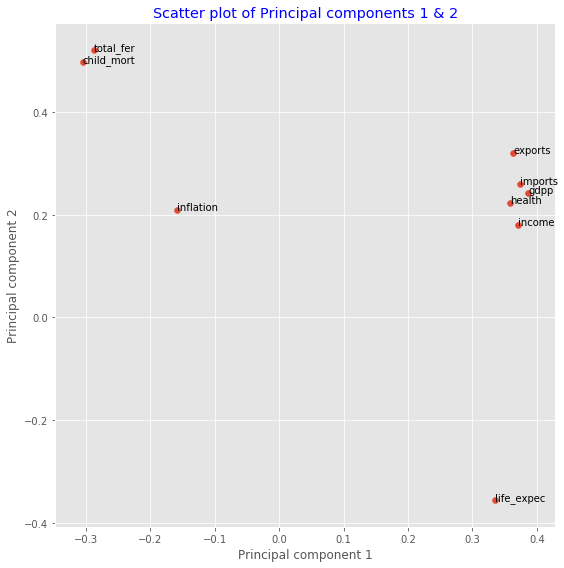

In [45]:
plt.figure(figsize=(8,8))
plt.scatter(x='PC1',y='PC2',data = country_pca);
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Scatter plot of Principal components 1 & 2',color='blue');
for i, text in enumerate(country_pca['Feature']):
    plt.annotate(text, (country_pca['PC1'][i],country_pca['PC2'][i]))
plt.tight_layout()

### Observations from above plot
- child_mort and total_fer rate are well explained by Principal Component 1 and 2
- imports and exports are well explained by Principal component 1 as compared to Prinicpal component 2
- income, helath, gdpp are more explained by PC1 as compared to PC2
- life_expec is more explained by PC2 as compared by PC1
- inflation is explained more by PC1 as compared to PC2

### Use below plot to visualise various principal components in pair

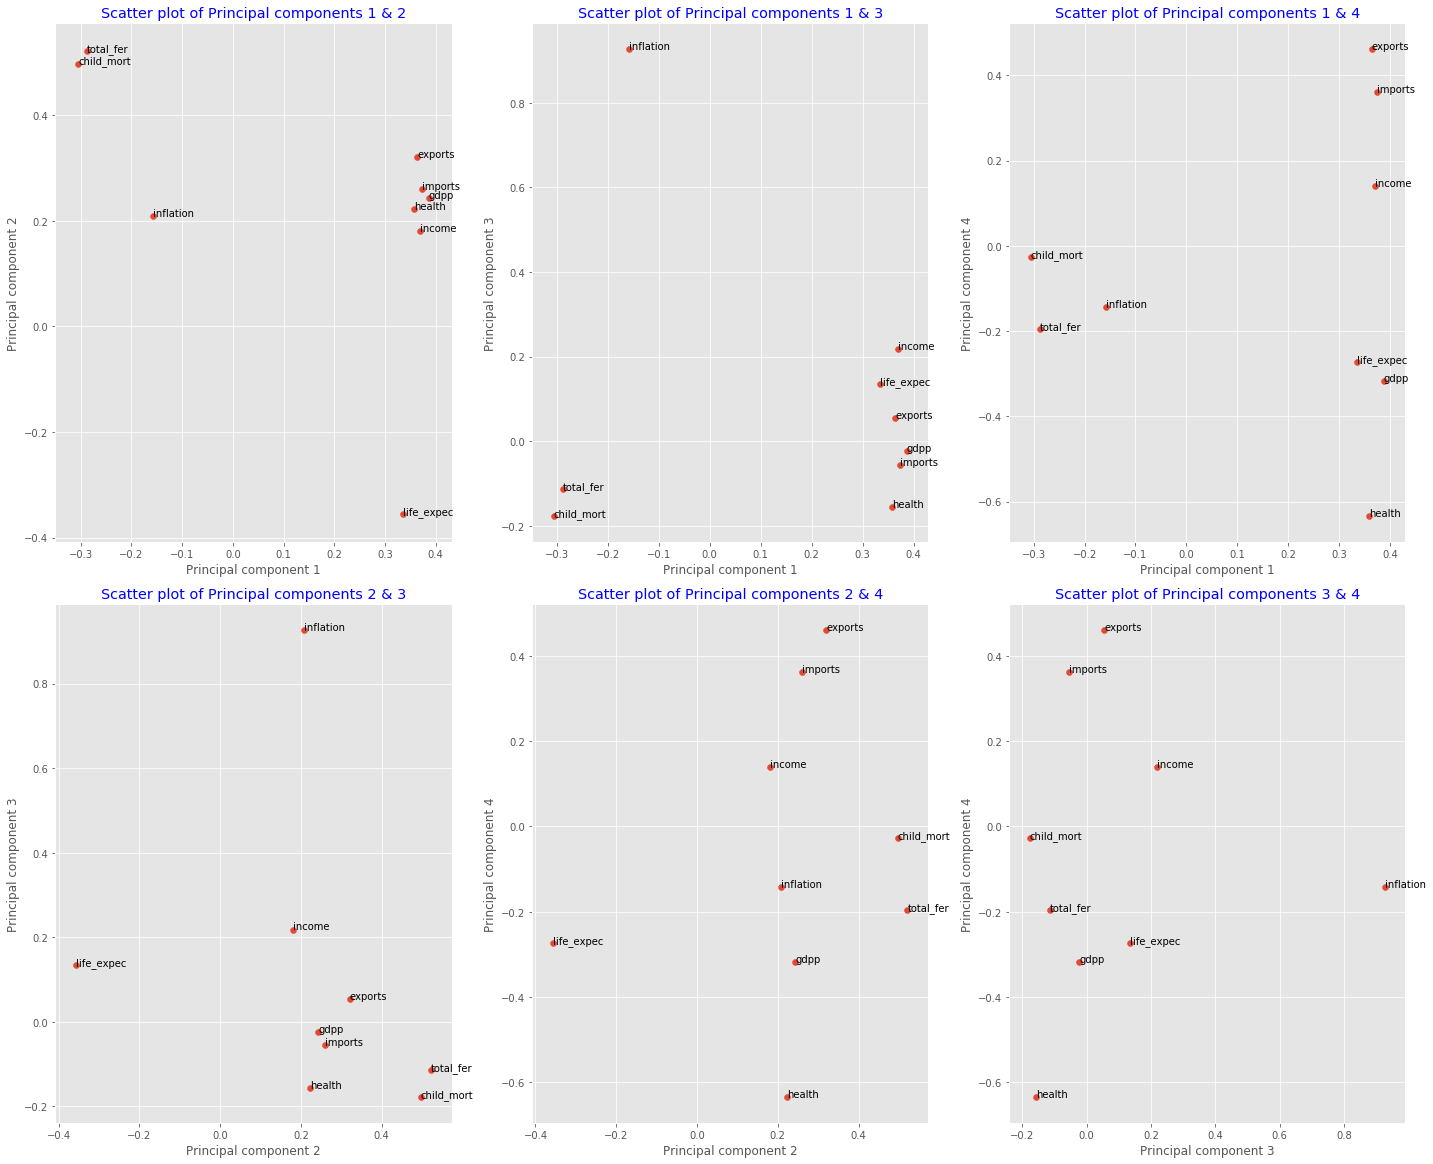

In [46]:
pca_cols_list = ['PC1','PC2','PC3','PC4']
plt.figure(figsize=(20,40))
plt.subplot(5,3,1)
plt.scatter(x='PC1',y='PC2',data = country_pca);
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Scatter plot of Principal components 1 & 2',color='blue');
for i, text in enumerate(country_pca['Feature']):
    plt.annotate(text, (country_pca['PC1'][i],country_pca['PC2'][i]))
plt.tight_layout()

plt.subplot(5,3,2)
plt.scatter(x='PC1',y='PC3',data = country_pca);
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 3')
plt.title('Scatter plot of Principal components 1 & 3',color='blue');
for i, text in enumerate(country_pca['Feature']):
    plt.annotate(text, (country_pca['PC1'][i],country_pca['PC3'][i]))
plt.tight_layout()

plt.subplot(5,3,3)
plt.scatter(x='PC1',y='PC4',data = country_pca);
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 4')
plt.title('Scatter plot of Principal components 1 & 4',color='blue');
for i, text in enumerate(country_pca['Feature']):
    plt.annotate(text, (country_pca['PC1'][i],country_pca['PC4'][i]))
plt.tight_layout()

plt.subplot(5,3,4)
plt.scatter(x='PC2',y='PC3',data = country_pca);
plt.xlabel('Principal component 2')
plt.ylabel('Principal component 3')
plt.title('Scatter plot of Principal components 2 & 3',color='blue');
for i, text in enumerate(country_pca['Feature']):
    plt.annotate(text, (country_pca['PC2'][i],country_pca['PC3'][i]))
plt.tight_layout()

plt.subplot(5,3,5)
plt.scatter(x='PC2',y='PC4',data = country_pca);
plt.xlabel('Principal component 2')
plt.ylabel('Principal component 4')
plt.title('Scatter plot of Principal components 2 & 4',color='blue');
for i, text in enumerate(country_pca['Feature']):
    plt.annotate(text, (country_pca['PC2'][i],country_pca['PC4'][i]))
plt.tight_layout()

plt.subplot(5,3,6)
plt.scatter(x='PC3',y='PC4',data = country_pca);
plt.xlabel('Principal component 3')
plt.ylabel('Principal component 4')
plt.title('Scatter plot of Principal components 3 & 4',color='blue');
for i, text in enumerate(country_pca['Feature']):
    plt.annotate(text, (country_pca['PC3'][i],country_pca['PC4'][i]))
plt.tight_layout()

## 9.3 Lets fit and transform data using 4 Principal components<a id='Four PCA'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [47]:
## Since the data set is not large enough so we don't need to fit IncrementalPCA here
pca = PCA(n_components=4)
#pca = IncrementalPCA(n_components=4)
country_pca_df = pca.fit_transform(country_sc_df[numerical_cols].values)

In [48]:
## Lets check the shape of dataframe after fitting PCA
country_pca_df.shape

(132, 4)

## 9.4 Lets plot heatmap for PCA components - there should be little to no correlation<a id='Heatmap PCA'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [49]:
corrmat = np.corrcoef(country_pca_df.transpose())
corrmat.shape

(4, 4)

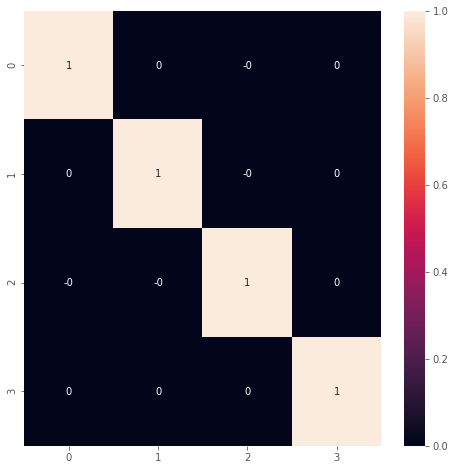

In [50]:
plt.figure(figsize=(8,8))
sns.heatmap(corrmat.round(4),annot=True);

## Observations from above heatmap
- The correlation coefficients is 0, this means there is no correlation between 4 components

# 10. Hopkins Statistics<a id='Hopkins Statistics'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## Lets apply Hopkins statistics and check how well the data can be clustered 
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

### Function for Hopkins staistics

In [51]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

### Lets apply Hopkins statistics

In [52]:
df1 = pd.DataFrame(country_pca_df)
hopkins(df1)

0.8281970291291305

### Since the score is greater than 50% so its a good score. This means the available data is good enough for clustering

# 11. Clustering<a id='Clustering'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## 11.1 Approach<a id='Clustering Approach'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

- To categorise countries based on their devlopment status, we will do hierarchical clustering first
- This will give us the idea about how many clusters we should form. We will create dendrogram for this and will the tree at approporiate height which will give us optimal clusters from hierarchical clustering
- We will use this number as input for number of clusters in K-Means
- We will then use the elbow-method and silhouette score to check for the optimal number of cluster
- From this we will get optimal number of k (no. of clusters)
- We will then again initialise K-Means algorithm with k as number of clusters and will check for the clusters

#### Lets create a copy of country dataframe which will be our final dataframe

In [53]:
hiercluster_df = country_df.copy()

## 11.2 Modelling - Hierarchical Clustering<a id='Hierarchical Clustering'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

### Hierarchical Clustering with single linkage

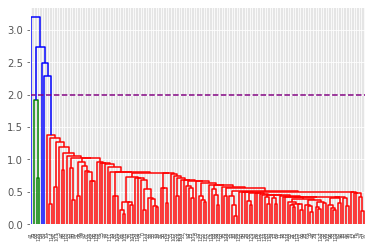

In [54]:
single_merging = linkage(country_pca_df,method = 'single',metric='euclidean')
dendrogram(single_merging)
plt.hlines(y=2.0, xmax=10000, xmin=0, colors="purple", linestyles="--");
plt.show();

### Hierarchical Clustering with complete linkage

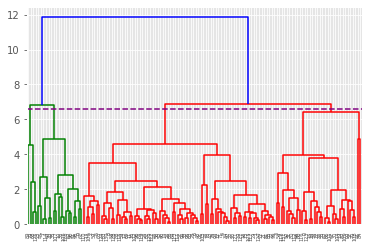

In [55]:
merging = linkage(country_pca_df,method = 'complete',metric='euclidean')
dendrogram(merging)
plt.hlines(y=6.6, xmax=10000, xmin=0, colors="purple", linestyles="--");
plt.show();

## Observations from above plots
- Hierarchical Clustering - complete linkage yields more clear results. So we will choose complete linkage results
- In complete linkage, since two clusters seems to be very less and looking at dendrogram, its difficult to cut the tree at a height where we can clearly get 4 clusters. So we can cut the tree at the height of 6.7 giving us 4 clusters as optimum

In [56]:
clustering_df = cut_tree(merging,n_clusters=4).reshape(-1,)
hiercluster_df['hir_cluster_id'] = clustering_df
hiercluster_df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  hir_cluster_id  
0       9.44        56.2       5.82    553               0  
1       4.49        76.3       1.65   4090               1  
2      16.10        76.5       2.89   4460               1  
3      22.40        60.1       6.16   3530               0  
4       1.44        76.8       2.13  12200               1

In [57]:
hiercluster_df['hir_cluster_id'].value_counts()

1    76
0    34
2    18
3     4
Name: hir_cluster_id, dtype: int64

### From above cell it can be observed that 
- there are very few countries in cluster 3
- Most of the countries are clusrtered in cluster 1 followed by cluster 0 and 2

## 11.3 Scatterplot of Principal Components and Hierarchical Cluster Ids<a id='Hierarchical PCA Clustering'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [58]:
hier_pca_df = pd.DataFrame(columns=['PC1','PC2','PC3','PC4'],data=country_pca_df)
hier_pca_df['hir_cluster_id'] = clustering_df
hier_pca_df.head()

PC1       PC2       PC3       PC4  hir_cluster_id
0 -3.318317  1.969200 -0.672216 -0.018476               0
1 -0.086490 -1.594816 -0.092446  0.024449               1
2 -0.640260 -0.582987  1.349962 -0.341802               1
3 -3.346506  3.018370  0.988583 -0.346677               0
4  1.170994 -0.820762 -0.430418  0.265008               1

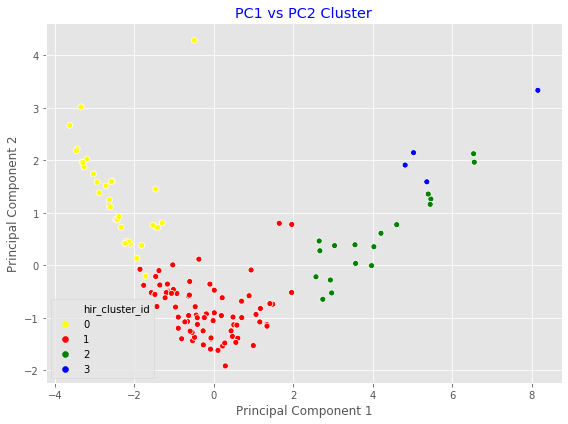

In [59]:
#cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
cmap=['yellow','red','green','blue']
plt.figure(figsize=(8,6))
ax = sns.scatterplot(hier_pca_df['PC1'], hier_pca_df['PC2'], hue=hier_pca_df['hir_cluster_id'],palette=cmap)
#plt.scatter(x='PC1',y='PC2',data=hier_pca_df,c='hir_cluster_id');
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PC1 vs PC2 Cluster',color='blue')
plt.tight_layout()
plt.legend();

## Lets visualise clusters using PCA features

<Figure size 2880x3600 with 0 Axes>

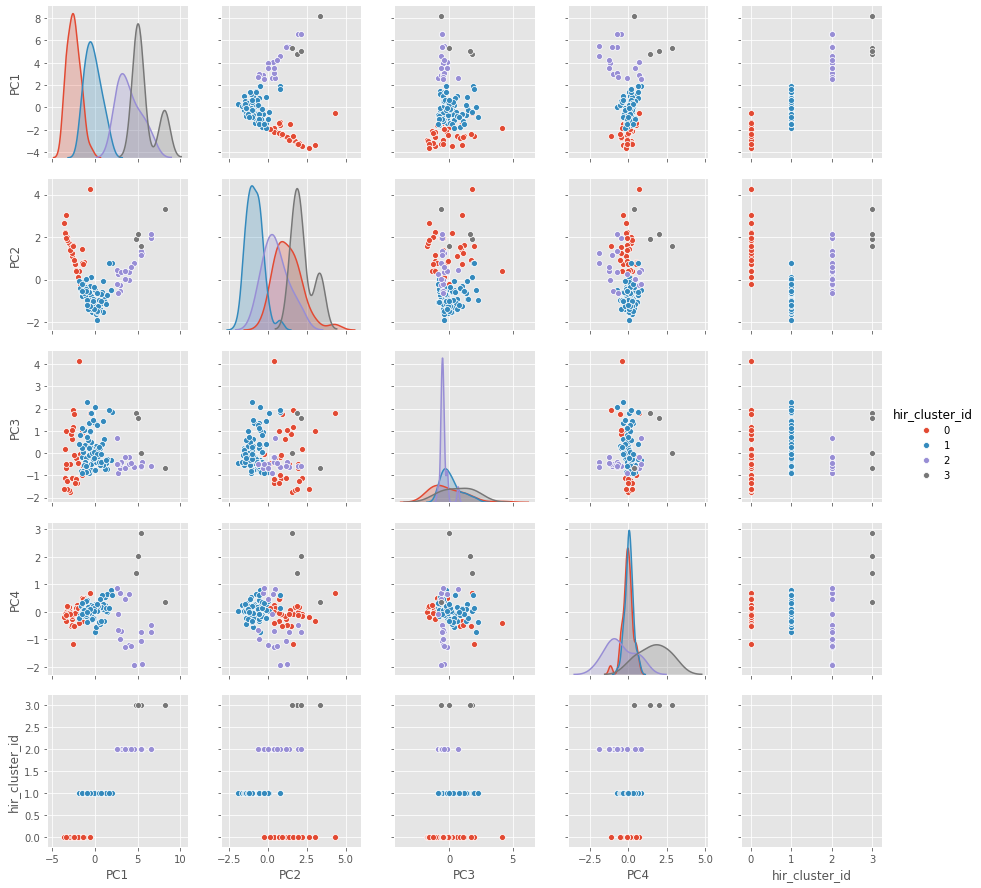

In [60]:
plt.figure(figsize=(40,50));
sns.pairplot(hue='hir_cluster_id',data=hier_pca_df);

## 11.4 Lets create scatterplot to understand more on how data has been clustered and the relationship of features in each cluster<a id='Hierarchical Scatterplot'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

<Figure size 3600x4320 with 0 Axes>

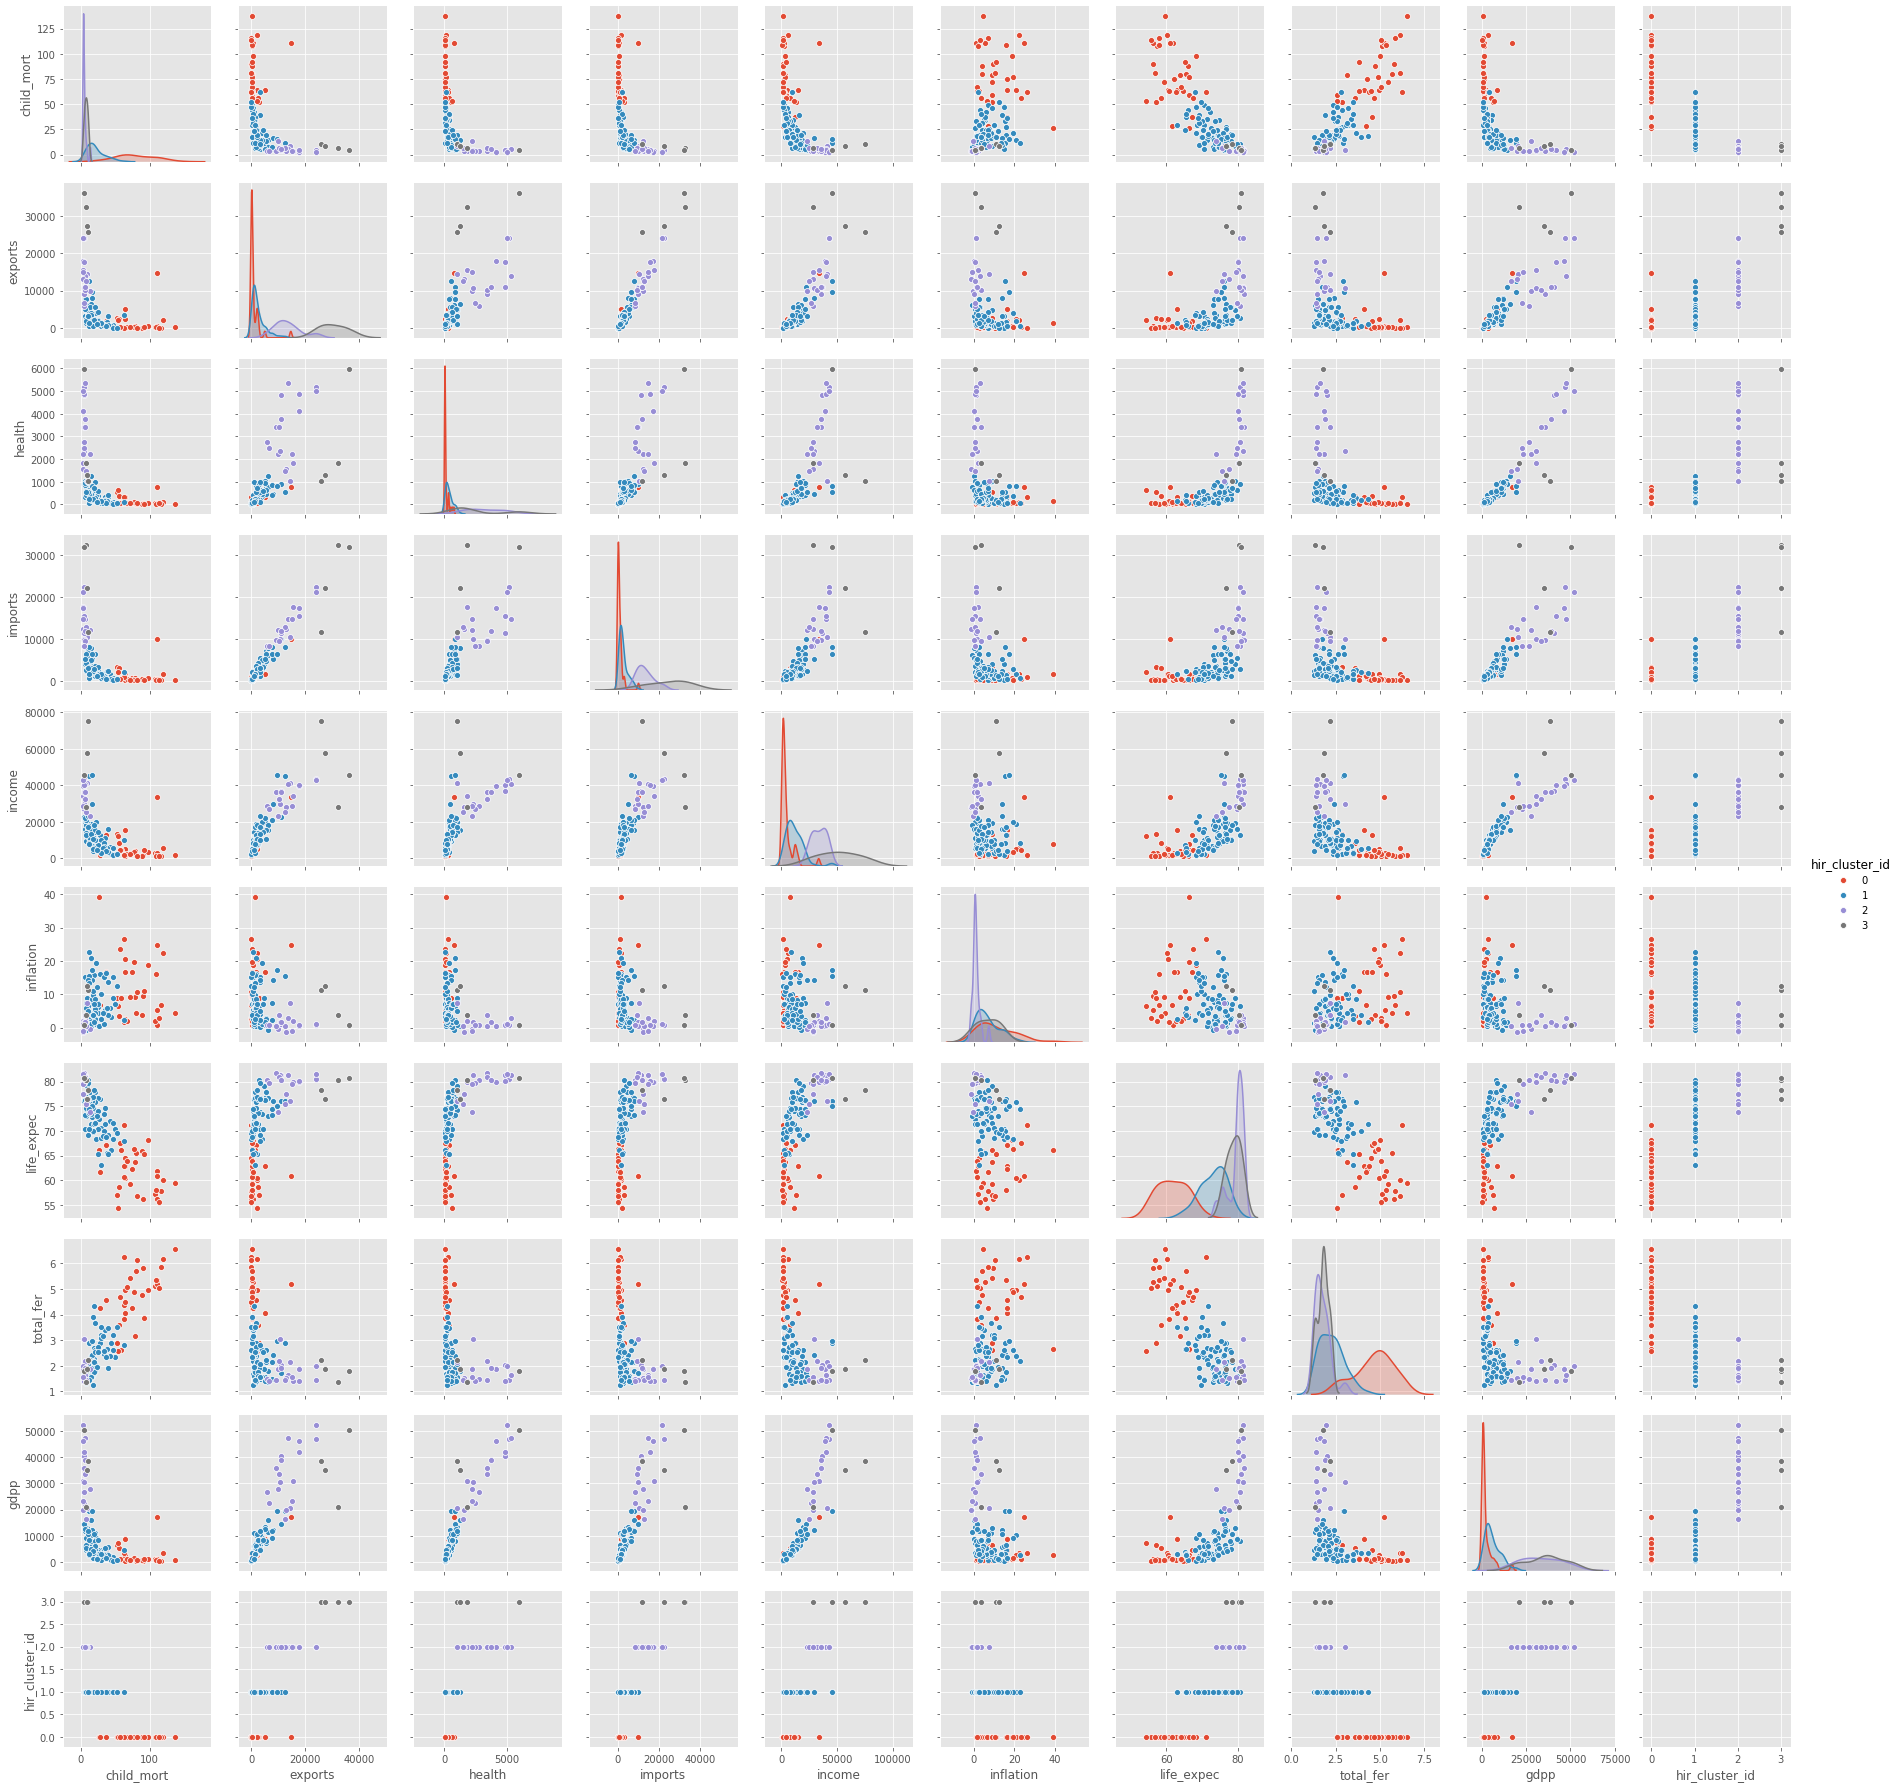

In [61]:
plt.figure(figsize=(50,60));
sns.pairplot(hue='hir_cluster_id',data=hiercluster_df);

## Observations from above plot
- GDP per capita (gdpp)
    - average gdpp is highest for countries with cluster_id 3 while its lowest for countries with cluster_id 0.
        - <b><u>child mortality rate and gdpp relationship</u></b>
            - It can be seen that as the gdp per capita decreases, child_mortality rate increases
            - countries with cluster_id 3 have highest average gdp per capita but the average child mortality rate is lowest for countries with cluster id 2
            - countries with cluster_id 0 have lowest average gdp per capita and highest average child mortality rate
        - <b><u>income and gdpp relationship</u></b>
            - It can be seen that with higher income, there is increase in gdp per capita
            - countries with cluster_id 3 have highest average gdp per capita and highest average income as well
            - countries with cluster_id 2 have lowest average gdp per capita and lowest average income as well
- Overall the cluters are well separable with few overlapping in between

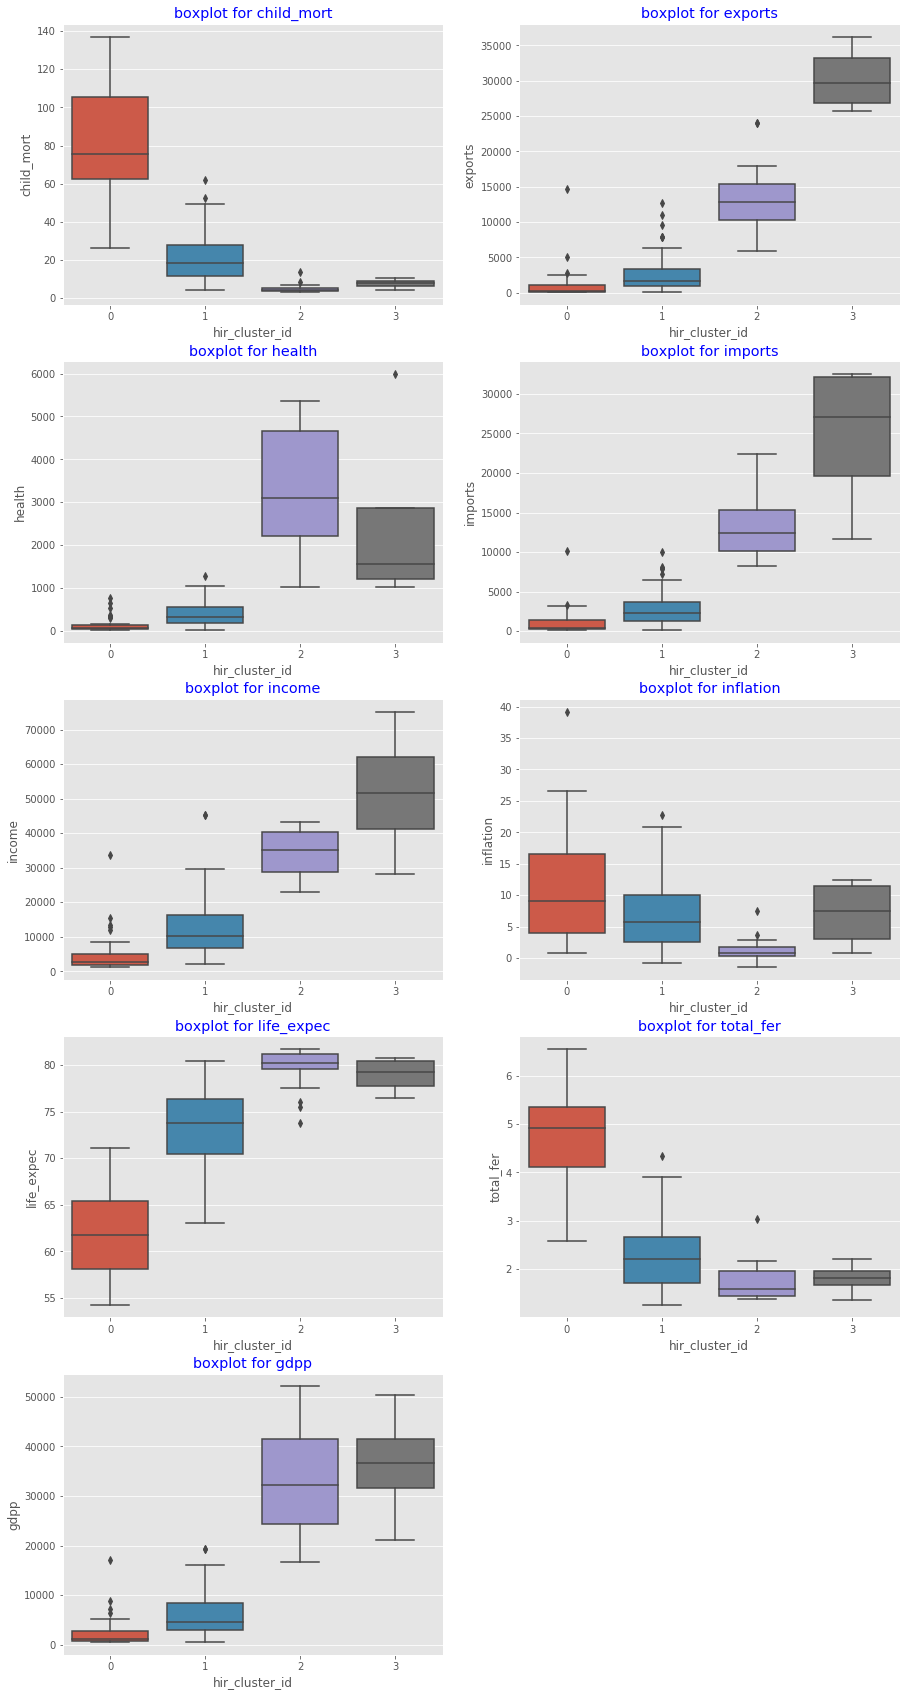

In [62]:
plt.figure(figsize=(15,30))
for i,col in enumerate(numerical_cols):
    plt.subplot(5,2,i+1)
    plt.title('boxplot for {0}'.format(col),color='blue')
    sns.boxplot(x='hir_cluster_id', y=col, data=hiercluster_df); 

In [63]:
round(hiercluster_df.groupby('hir_cluster_id').describe(),2)

child_mort                                                   \
                    count   mean    std   min    25%    50%     75%    max   
hir_cluster_id                                                               
0                    34.0  78.86  27.41  26.1  62.30  75.70  105.35  137.0   
1                    76.0  21.23  12.68   4.5  11.42  18.35   27.75   62.0   
2                    18.0   5.09   2.63   3.0   3.68   4.20    5.50   13.8   
3                     4.0   7.68   2.68   4.5   6.22   7.70    9.15   10.8   

               exports                                                   \
                 count      mean      std       min       25%       50%   
hir_cluster_id                                                            
0                 34.0   1198.21  2624.35     55.30    135.42    291.19   
1                 76.0   2664.13  2585.14     56.71    939.03   1733.35   
2                 18.0  13465.44  5066.77   5944.90  10335.83  12866.90   
3                  4.0  30343.38  4827.49  25679.50  26816.12  29739.00   

                                  health                                      \
                     75%      max  count     mean      std      min      25%   
hir_cluster_id                                                                 
0                1087.16  14671.8   34.0   146.83   187.47    22.88    43.13   
1                3380.58  12680.1   76.0   395.03   298.80    26.68   173.93   
2               15357.75  24070.2   18.0  3210.64  1417.39  1028.79  2203.76   
3               33266.25  36216.0    4.0  2526.10  2331.04  1012.55  1213.89   

                                          imports                     \
                    50%      75%      max   count      mean      std   
hir_cluster_id                                                         
0                 61.89   135.69   766.08    34.0   1082.35  1779.72   
1                310.42   548.33  1275.20    76.0   2788.28  2144.24   
2               3087.20  4657.27  5356.20    18.0  13387.64  4143.74   
3               1553.08  2865.29  5985.70     4.0  24612.20  9810.22   

                                                                income  \
                     min       25%       50%       75%      max  count   
hir_cluster_id                                                           
0                 168.90    250.02    426.82   1421.71  10071.9   34.0   
1                 165.24   1276.37   2273.56   3625.41  10030.2   76.0   
2                8258.30  10184.62  12345.10  15310.50  22418.2   18.0   
3               11704.00  19621.00  27125.40  32116.60  32494.0    4.0   

                                                                        \
                    mean       std      min      25%      50%      75%   
hir_cluster_id                                                           
0                5117.35   6338.30   1190.0   1742.5   2675.0   5012.5   
1               12288.82   8157.29   1990.0   6707.5  10180.0  16225.0   
2               34122.22   6459.79  22900.0  28700.0  35050.0  40250.0   
3               51650.00  19774.14  28300.0  41200.0  51550.0  62000.0   

                        inflation                                        \
                    max     count   mean   std   min   25%   50%    75%   
hir_cluster_id                                                            
0               33700.0      34.0  11.30  9.11  0.88  3.98  9.09  16.60   
1               45400.0      76.0   7.01  5.64 -0.81  2.54  5.72  10.02   
2               43200.0      18.0   1.26  1.98 -1.43  0.38  0.82   1.72   
3               75200.0       4.0   7.09  5.65  0.85  3.08  7.52  11.52   

                      life_expec                                          \
                  max      count   mean   std   min    25%    50%    75%   
hir_cluster_id                                                             
0               39.20       34.0  61.83  4.23  54.3  58.15  61.75  65.45   
1       

## Lets plot top cluster with countries wrt each feature

average child_mort is highest for cluster id 0
average exports is highest for cluster id 3
average health is highest for cluster id 2
average imports is highest for cluster id 3
average income is highest for cluster id 3
average inflation is highest for cluster id 0
average life_expec is highest for cluster id 2
average total_fer is highest for cluster id 0
average gdpp is highest for cluster id 3


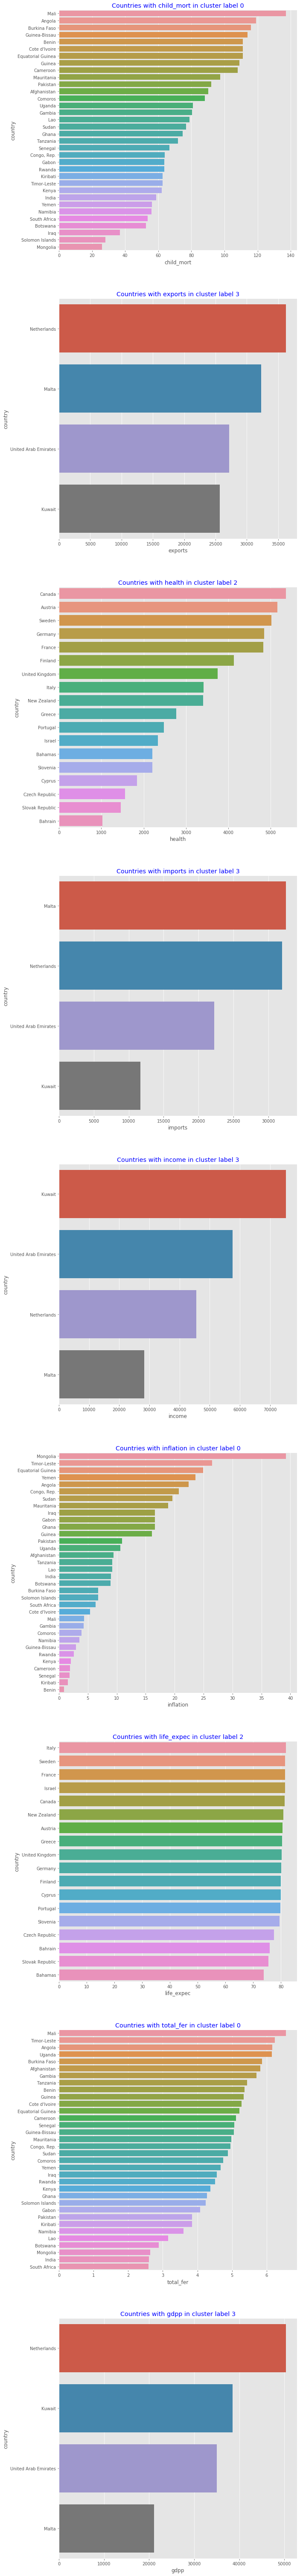

In [64]:
plt.figure(figsize=(10,110))
for i,col in enumerate(numerical_cols):
    plt.subplot(9,1,i+1)
    hir_cluster_id = hiercluster_df.groupby('hir_cluster_id')[col].mean().sort_values(ascending=False).index[0]
    print('average {0} is highest for cluster id {1}'.format(col,hir_cluster_id))
    plt.title('Countries with {0} in cluster label {1}'.format(col,hir_cluster_id),color='blue')
    filter_df = hiercluster_df[
        hiercluster_df['hir_cluster_id']==hir_cluster_id][['country',col]].sort_values(by=col,ascending=False)
    sns.barplot(y=filter_df['country'],x = filter_df[col].sort_values(ascending=False));

## List of countries that need more focus

- for that we will consider countries with high child mortality rate, low gdpp and low income
- such countries are in dire need of aid

In [65]:
## list of countries with high child mortality rate
cluster_id = hiercluster_df.groupby(
    'hir_cluster_id')['child_mort'].mean().sort_values(ascending=False).index[0]
child_mort_country_list = list(hiercluster_df[hiercluster_df['hir_cluster_id']==cluster_id]['country'])

print('number of countries with high child mortality rate: {0}'.format(len(child_mort_country_list)))

## list of countries with low gdpp
cluster_id = hiercluster_df.groupby(
    'hir_cluster_id')['gdpp'].mean().sort_values(ascending=True).index[0]
gdpp_country_list = list(hiercluster_df[hiercluster_df['hir_cluster_id']==cluster_id]['country'])

print('number of countries with low gdpp: {0}'.format(len(gdpp_country_list)))

## list of countries with low income
cluster_id = hiercluster_df.groupby(
    'hir_cluster_id')['income'].mean().sort_values(ascending=True).index[0]
income_country_list = list(hiercluster_df[hiercluster_df['hir_cluster_id']==cluster_id]['country'])

print('number of countries with low income: {0}'.format(len(income_country_list)))

hir_common_countries = [country for country in child_mort_country_list 
                    if country in gdpp_country_list and 
                    country in income_country_list]

print('\nnumber of countries that need aid: {0}'.format(len(hir_common_countries)))
print('\nlist of such countries: \n{0}'.format(hir_common_countries))


number of countries with high child mortality rate: 34
number of countries with low gdpp: 34
number of countries with low income: 34

number of countries that need aid: 34

list of such countries: 
['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Cameroon', 'Comoros', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'India', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Mali', 'Mauritania', 'Mongolia', 'Namibia', 'Pakistan', 'Rwanda', 'Senegal', 'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Uganda', 'Yemen']


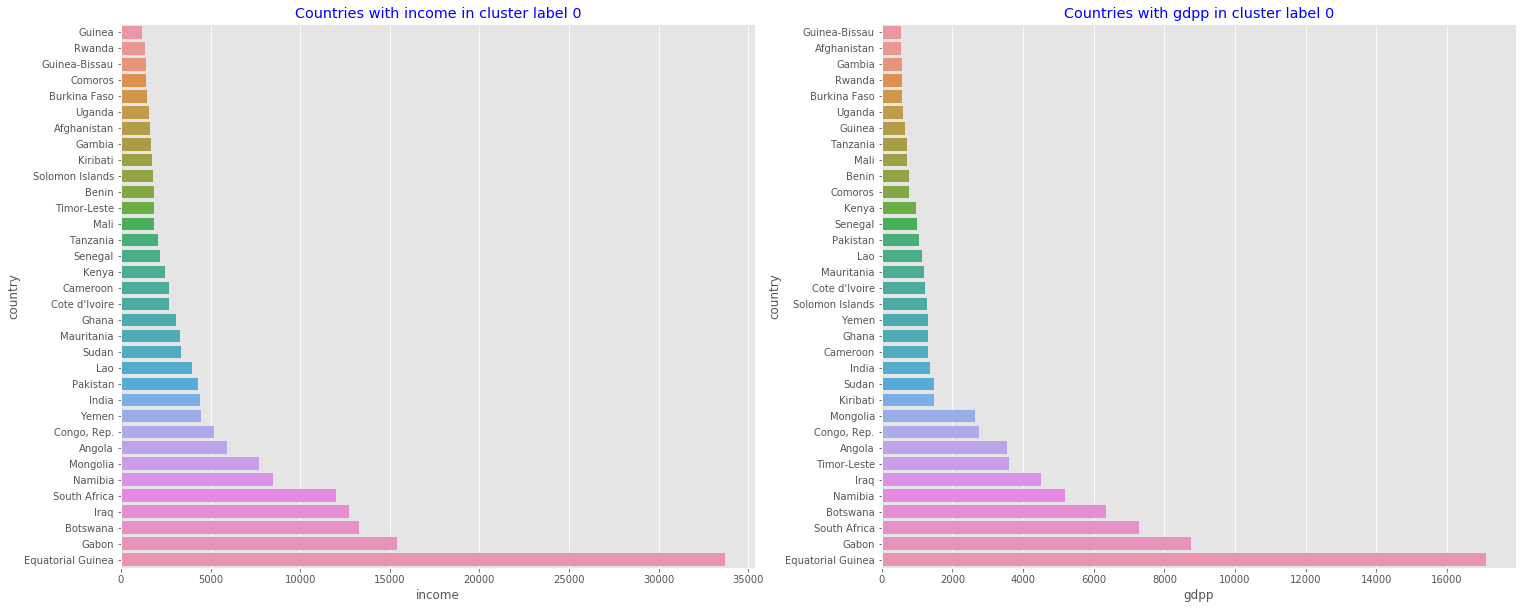

In [66]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
col='income'
cluster_id = 0
plt.title('Countries with {0} in cluster label {1}'.format(col,cluster_id),color='blue')
filter_df = hiercluster_df[
    hiercluster_df['hir_cluster_id']==0][['country',col]].sort_values(by=col,ascending=True)
sns.barplot(y=filter_df['country'],x = filter_df[col].sort_values(ascending=True));

plt.subplot(1,2,2)
col='gdpp'
plt.title('Countries with {0} in cluster label {1}'.format(col,cluster_id),color='blue')
filter_df = hiercluster_df[
    hiercluster_df['hir_cluster_id']==0][['country',col]].sort_values(by=col,ascending=True)
sns.barplot(y=filter_df['country'],x = filter_df[col].sort_values(ascending=True));

## 11.5 Modelling - KMeans Clustering<a id='KMeans Clustering'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

#### Lets create a copy of country dataframe which will be our final dataframe

In [67]:
kmeanscluster_df = country_df.copy()

### Using outcome of number of components = 4 from hierarchical clustering, lets apply K-Means alogrithm and further check if n=4 is optimal

In [68]:
kmeans = KMeans(n_clusters=4,random_state=100)
kmeans.fit(country_pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [69]:
kmeans.labels_

array([2, 3, 3, 2, 0, 3, 3, 1, 3, 0, 0, 3, 0, 3, 3, 2, 3, 3, 3, 2, 3, 3,
       2, 3, 2, 1, 3, 0, 3, 3, 2, 2, 3, 2, 0, 1, 0, 3, 3, 3, 3, 2, 0, 3,
       1, 1, 2, 2, 3, 1, 2, 0, 3, 3, 2, 2, 3, 3, 3, 3, 2, 0, 1, 3, 3, 3,
       2, 2, 1, 3, 2, 0, 0, 0, 0, 3, 0, 3, 2, 1, 2, 3, 3, 3, 3, 3, 3, 2,
       3, 1, 1, 0, 2, 0, 3, 3, 3, 0, 0, 3, 3, 2, 3, 0, 2, 3, 0, 0, 2, 2,
       3, 3, 2, 3, 1, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 1, 1, 3, 3, 3, 3, 2],
      dtype=int32)

In [70]:
kmeanscluster_df['kmeans_cluster_id'] = kmeans.labels_
kmeanscluster_df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  kmeans_cluster_id  
0       9.44        56.2       5.82    553                  2  
1       4.49        76.3       1.65   4090                  3  
2      16.10        76.5       2.89   4460                  3  
3      22.40        60.1       6.16   3530                  2  
4       1.44        76.8       2.13  12200                  0

## 11.6 Silhouette Score and Elbow-Curve <a id='SSD Elbow Curve'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## Lets further check what is the optimal number of clusters
- For this we will use elbow-curve and silhouette score
### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

## SSD/ elbow-curve

For n_clusters=2, the silhouette score is 0.5157343170623355 and squared error is 588.58
For n_clusters=3, the silhouette score is 0.4421125006356147 and squared error is 359.35
For n_clusters=4, the silhouette score is 0.4008948839749418 and squared error is 298.98
For n_clusters=5, the silhouette score is 0.29981581747665137 and squared error is 253.07
For n_clusters=6, the silhouette score is 0.3140182933762771 and squared error is 212.26
For n_clusters=7, the silhouette score is 0.33671276957059926 and squared error is 185.78
For n_clusters=8, the silhouette score is 0.36413284750143793 and squared error is 157.31
For n_clusters=9, the silhouette score is 0.3312917458554798 and squared error is 138.61


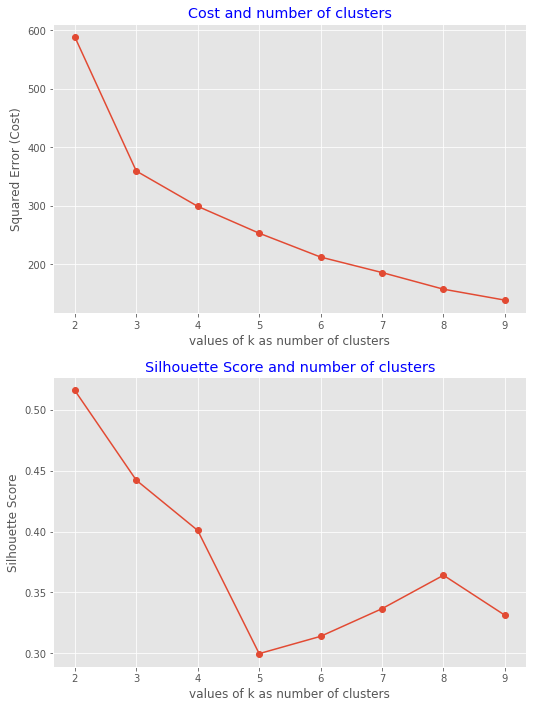

In [71]:
ssd = []
sse = []
range_n_clusters = [2,3,4,5,6,7,8,9]
for i,num_cluster in enumerate(range_n_clusters):
    kmeans = KMeans(n_clusters=num_cluster)
    kmeans.fit(country_pca_df)
    ssd.append(kmeans.inertia_)
    ##silhouette score
    silhouette_avg = silhouette_score(country_pca_df,kmeans.labels_)
    sse.append(silhouette_avg)
    print("For n_clusters={0}, the silhouette score is {1} and squared error is {2}".
          format(num_cluster, silhouette_avg, kmeans.inertia_.round(2)))

plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.plot(ssd,marker='o');
plt.title('Cost and number of clusters',color='blue')
plt.xlabel('values of k as number of clusters')
plt.ylabel('Squared Error (Cost)');
plt.xticks(np.arange(len(range_n_clusters)), range_n_clusters);
plt.tight_layout(pad=3.0)
plt.subplot(2,1,2)
plt.plot(sse,marker='o');
plt.title('Silhouette Score and number of clusters',color='blue')
plt.xlabel('values of k as number of clusters')
plt.ylabel('Silhouette Score');
plt.xticks(np.arange(len(range_n_clusters)), range_n_clusters);

## Observations from above plot
- It seems <b><u>4</b></u> is the optimal number for clustering from statistical point of view
- Based on this lets choose optimal number of clusters i.e. k=4 and rerun K-Means algorithm
- <b><font size = 3 color = "blue">It can be seen that the optimal number of clusters from Hierarchical clustering were 4 and from K-Means clustering is also 4</font></b>

## 11.7 Lets apply K-Means algorithm again with number of clusters as 4 this time <a id='K Means with Optimal k'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [72]:
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(country_pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [73]:
kmeans.labels_

array([0, 2, 2, 0, 3, 2, 2, 1, 2, 3, 3, 2, 3, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 1, 2, 3, 2, 2, 0, 0, 2, 0, 3, 1, 3, 2, 2, 2, 2, 0, 3, 2,
       1, 1, 0, 0, 2, 1, 0, 3, 2, 2, 0, 0, 2, 2, 2, 2, 0, 3, 1, 2, 2, 2,
       0, 0, 1, 2, 0, 3, 3, 3, 3, 2, 3, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 1, 1, 3, 0, 3, 2, 2, 2, 3, 3, 2, 2, 0, 2, 3, 0, 2, 3, 3, 0, 0,
       2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0],
      dtype=int32)

## Lets concatenate these cluster Ids with pca dataframe and principal components as features

In [74]:
kmeans_pca_df = pd.DataFrame(columns = ['PC1','PC2','PC3','PC4'],data=country_pca_df)
kmeans_pca_df['kmeans_cluster_id'] = kmeans.labels_
kmeans_pca_df.head()

PC1       PC2       PC3       PC4  kmeans_cluster_id
0 -3.318317  1.969200 -0.672216 -0.018476                  0
1 -0.086490 -1.594816 -0.092446  0.024449                  2
2 -0.640260 -0.582987  1.349962 -0.341802                  2
3 -3.346506  3.018370  0.988583 -0.346677                  0
4  1.170994 -0.820762 -0.430418  0.265008                  3

In [75]:
kmeans_pca_df['kmeans_cluster_id'].value_counts()

2    64
0    32
3    22
1    14
Name: kmeans_cluster_id, dtype: int64

## 11.8 Scatterplot of Principal Components and K-Means Cluster Ids<a id='KMeans PCA Clustering'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

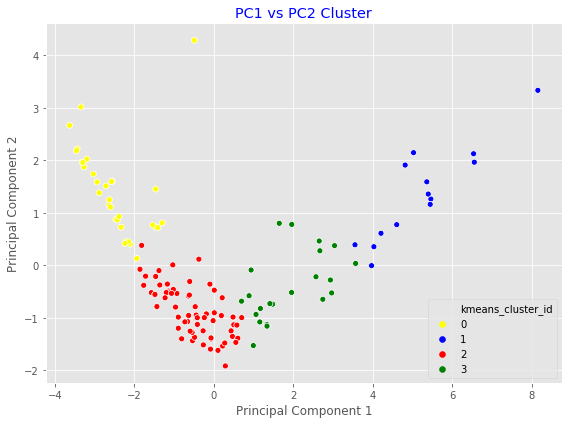

In [76]:
cmap=['yellow','blue','red','green']
plt.figure(figsize=(8,6))
ax = sns.scatterplot(kmeans_pca_df['PC1'], 
                     kmeans_pca_df['PC2'], hue=kmeans_pca_df['kmeans_cluster_id'],palette=cmap)
#plt.scatter(x='PC1',y='PC2',data=kmeans_pca_df,c='kmeans_cluster_id');
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PC1 vs PC2 Cluster',color='blue')
plt.tight_layout()

## Lets visualise clusters using PCA features

<Figure size 2880x3600 with 0 Axes>

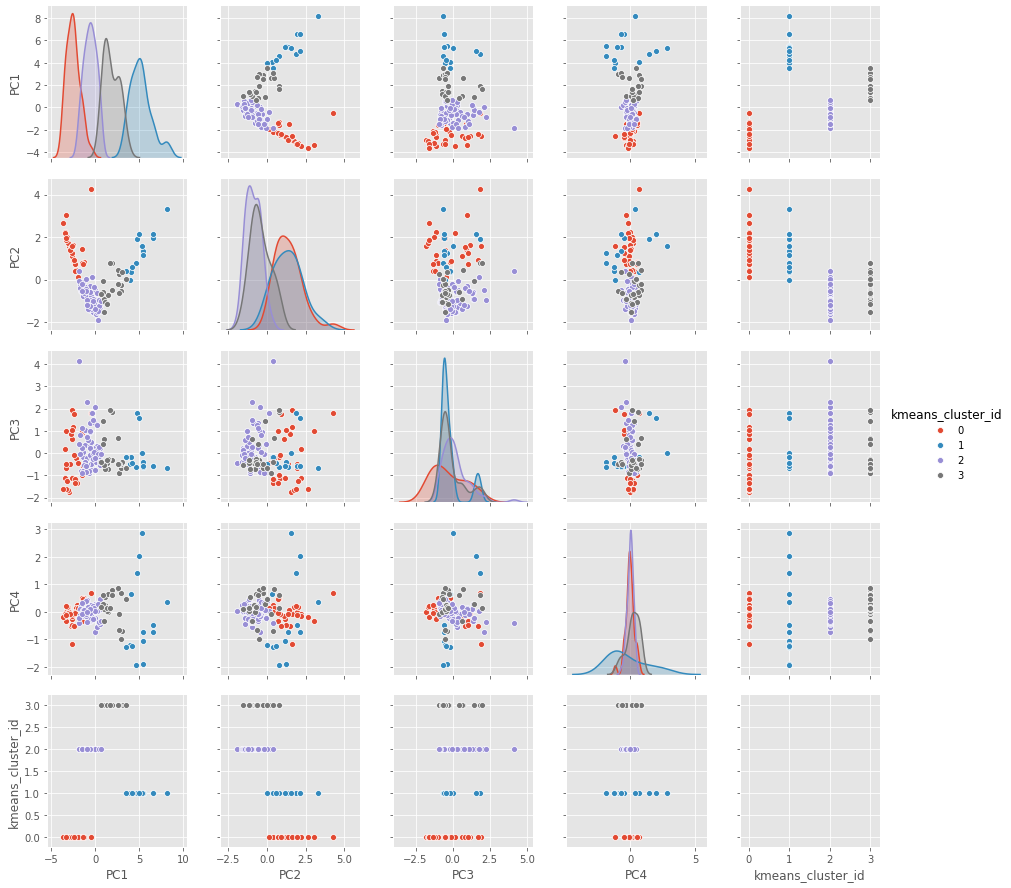

In [77]:
plt.figure(figsize=(40,50));
sns.pairplot(hue='kmeans_cluster_id',data=kmeans_pca_df);

### From above it can be seen that 
- clusters are well separable between components PC1 & PC2, PC1 & PC3, PC1 & PC4
- in relationship between components other than PC1, example PC2 & PC3, PC3 & PC4 - the clusters start to overalp 

In [78]:
kmeans_pca_df.groupby('kmeans_cluster_id').describe().round(2)

PC1                                             PC2        \
                  count  mean   std   min   25%   50%   75%   max count  mean   
kmeans_cluster_id                                                               
0                  32.0 -2.49  0.75 -3.63 -3.08 -2.57 -2.14 -0.49  32.0  1.40   
1                  14.0  5.22  1.23  3.55  4.31  5.19  5.46  8.16  14.0  1.36   
2                  64.0 -0.54  0.70 -1.86 -1.08 -0.54 -0.01  0.70  64.0 -0.86   
3                  22.0  1.87  0.87  0.70  1.16  1.56  2.66  3.57  22.0 -0.40   

                                                        PC3                    \
                    std   min   25%   50%   75%   max count  mean   std   min   
kmeans_cluster_id                                                               
0                  0.88  0.13  0.76  1.32  1.90  4.29  32.0 -0.26  1.13 -1.77   
1                  0.90 -0.00  0.65  1.31  1.95  3.34  14.0 -0.13  0.81 -0.67   
2                  0.49 -1.91 -1.25 -0.95 -0.52  0.38  64.0  0.18  0.90 -0.91   
3                  0.64 -1.53 -0.80 -0.55  0.01  0.80  22.0 -0.06  0.84 -0.89   

                                            PC4                                \
                    25%   50%   75%   max count  mean   std   min   25%   50%   
kmeans_cluster_id                                                               
0                 -1.18 -0.49  0.87  1.94  32.0 -0.04  0.35 -1.16 -0.17 -0.04   
1                 -0.57 -0.48 -0.16  1.82  14.0 -0.23  1.48 -1.92 -1.23 -0.75   
2                 -0.43 -0.04  0.42  4.15  64.0 -0.00  0.24 -0.72 -0.14  0.03   
3                 -0.51 -0.41  0.24  1.96  22.0  0.21  0.52 -0.99  0.02  0.23   

                               
                    75%   max  
kmeans_cluster_id              
0                  0.14  0.68  
1                  0.59  2.87  
2                  0.15  0.45  
3                  0.62  0.85

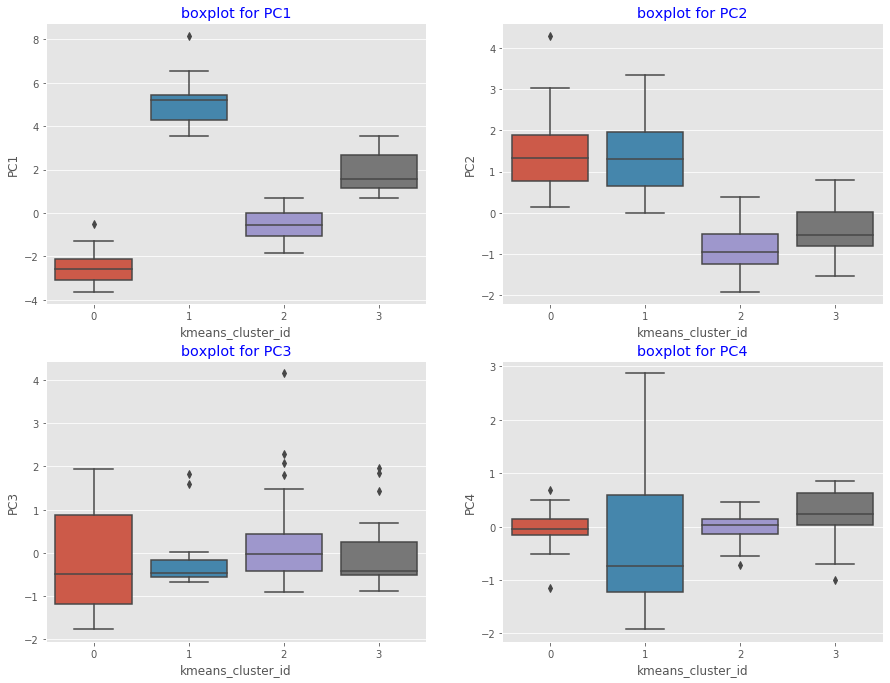

In [79]:
plt.figure(figsize=(15,30))
pca_cols = ['PC1','PC2','PC3','PC4']
for i,col in enumerate(pca_cols):
    plt.subplot(5,2,i+1)
    plt.title('boxplot for {0}'.format(col),color='blue')
    sns.boxplot(x='kmeans_cluster_id', y=col, data=kmeans_pca_df); 

## Observations from above plot
- Since features are PCA components so we will explain cluster Ids based on these features only and not original features
- Principal component PC1 
    - Cluster Id 1 has highest median while its lowest for Cluster Id 0. Cluster Id 1 has the highest standard deviation
    - The maximum number of countries are clusterd in cluster Id 2 (#64) while Cluster Id 1 has the lowest number of countries (#14)
    - There are outliers in cluster id 0 and 1
- Principal component PC2
    - Cluster Id 1 has highest median while its lowest for Cluster Id 3. Cluster Id 1 has the highest standard deviation
    - The maximum number of countries are clusterd in cluster Id 2 (#64) while Cluster Id 1 has the lowest number of countries (#14)
    - There are outliers in cluster id 0
- Principal component PC3
    - Cluster Id 2 has highest median while its lowest for Cluster Id 0. Cluster Id 1 has the highest standard deviation
    - The maximum number of countries are clusterd in cluster Id 2 (#64) while Cluster Id 1 has the lowest number of countries (#14)
    - There are outliers in cluster id 1, 2 and 3
- Principal component PC4
    - Cluster Id 3 has highest median while its lowest for Cluster Id 1. Cluster Id 1 has the highest standard deviation
    - The maximum number of countries are clusterd in cluster Id 2 (#64) while Cluster Id 1 has the lowest number of countries (#14)
    - There are outliers in cluster id 0, 2 and 3

## Lets concatenate kmeans cluster Ids with original dataframe having original features as well

In [80]:
##reset kmeans_cluster labels in dataframe
kmeanscluster_df['kmeans_cluster_id'] = kmeans.labels_
kmeanscluster_df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  kmeans_cluster_id  
0       9.44        56.2       5.82    553                  0  
1       4.49        76.3       1.65   4090                  2  
2      16.10        76.5       2.89   4460                  2  
3      22.40        60.1       6.16   3530                  0  
4       1.44        76.8       2.13  12200                  3

## 11.9 Lets visualise clusters using original features and K-Means Cluster Ids<a id='KMeans Clustering Scatterplot Original Features'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

<Figure size 3600x4320 with 0 Axes>

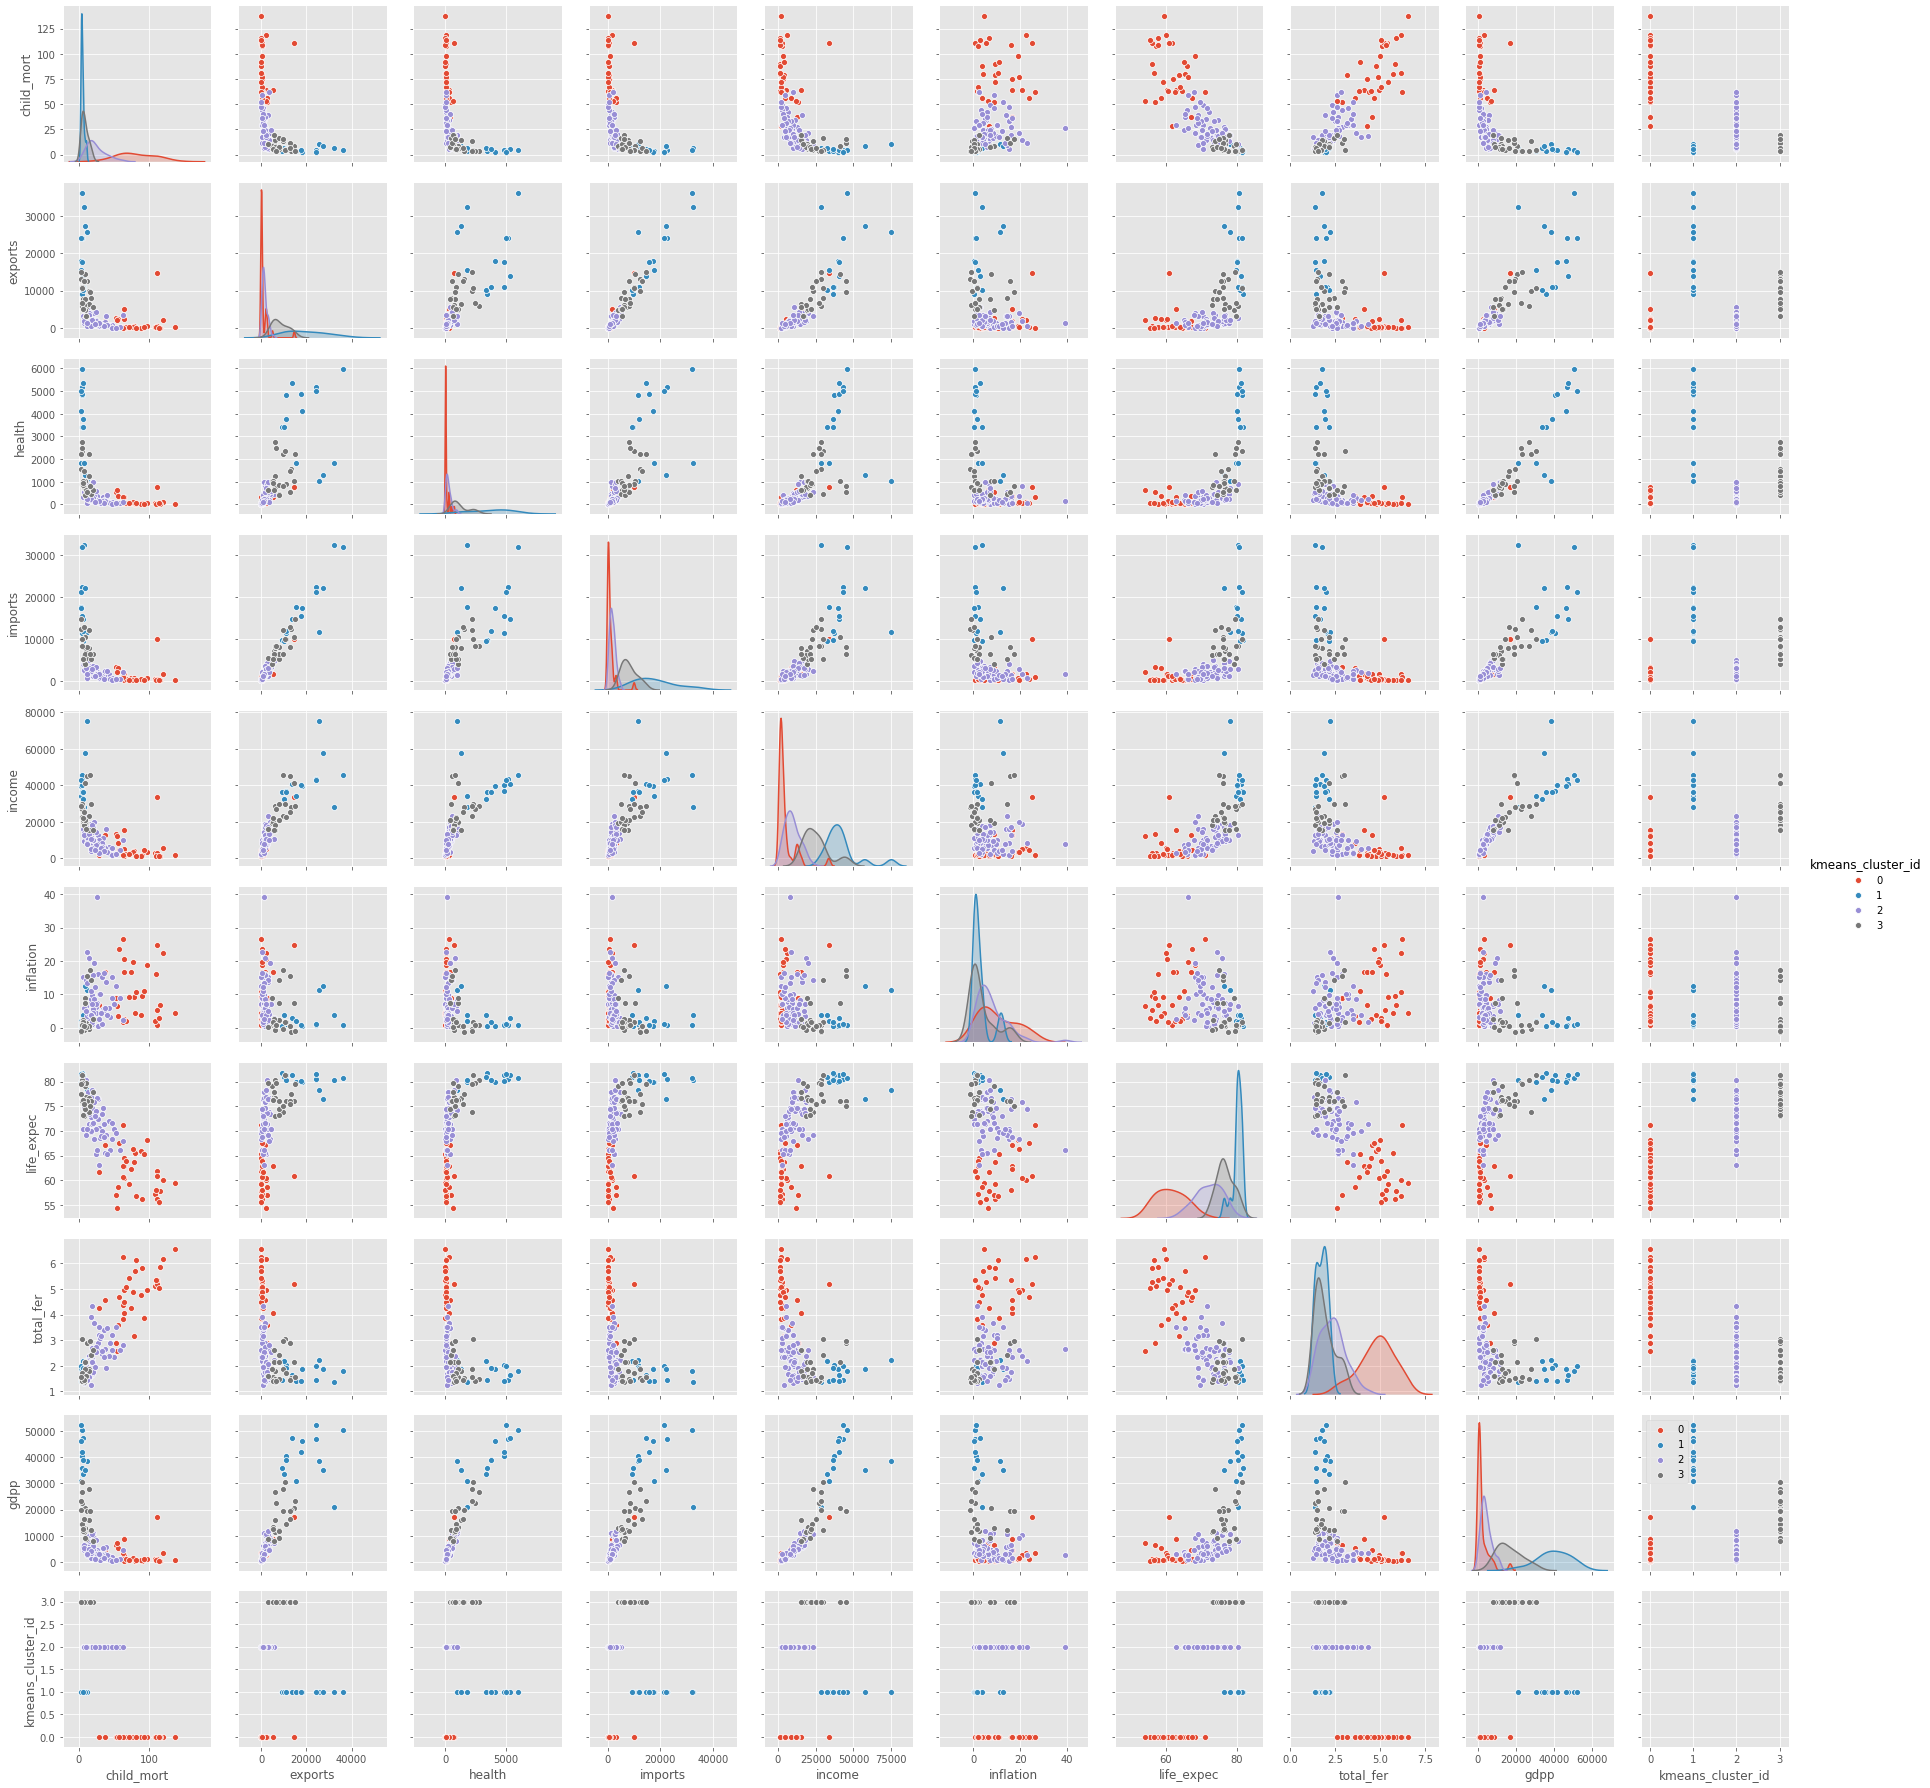

In [81]:
plt.figure(figsize=(50,60))
sns.pairplot(hue='kmeans_cluster_id',data=kmeanscluster_df);
plt.legend();

## Observations from above plot
- GDP per capita (gdpp)
    - average gdpp is highest for countries with cluster_id 1 while its lowest for countries with cluster_id 0.
        - <b><u>child mortality rate and gdpp relationship</u></b>
            - It can be seen that as the gdp per capita decreases, child_mortality rate increases
            - countries with cluster_id 1 have highest average gdp per capita lowest average child mortality rate
            - countries with cluster_id 0 have lowest average gdp per capita and highest average child mortality rate
        - <b><u>income and gdpp relationship</u></b>
            - It can be seen that with higher income, there is increase in gdp per capita
            - countries with cluster_id 1 have highest average gdp per capita and highest average income as well
            - countries with cluster_id 0 have lowest average gdp per capita and lowest average income as well
- Overall the cluters are well separable with few overlapping in between

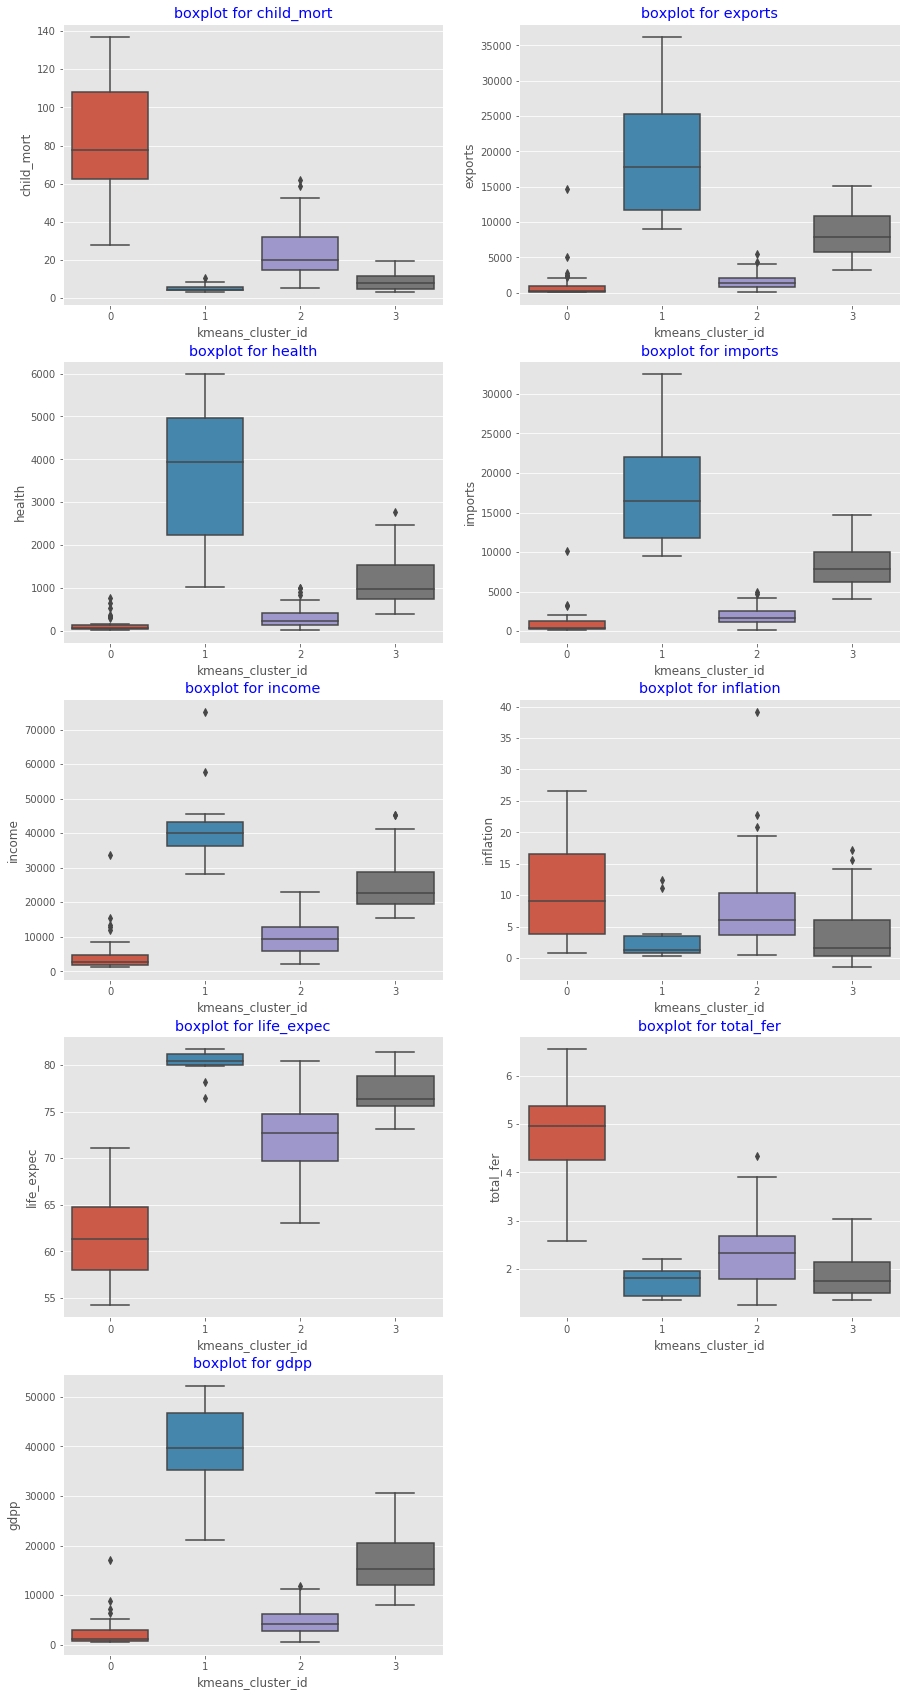

In [82]:
plt.figure(figsize=(15,30))
for i,col in enumerate(numerical_cols):
    plt.subplot(5,2,i+1)
    plt.title('boxplot for {0}'.format(col),color='blue')
    sns.boxplot(x='kmeans_cluster_id', y=col, data=kmeanscluster_df); 

## Observations from above plot
- The average child_mort is highest for cluster_id 0 while its lowest for cluster_id 1. There is high variance for cluster_id 0 as well
    - There are few outliers in cluster id 1 and 2 for child mortatlity rate
- The average exports is highest for cluster id 1 while its lowest for cluster id 0
    - There are few outliers in cluster ids 0, 2 for exports
- The average health rate is highest for cluster id 1 while its lowest for cluster id 0
    - There are few outliers in cluster ids 0, 1 and 3 for health rate
- The average imports is highest for cluster_id 1 while its lowest for clusre_id 0
    - There are few outliers in cluster id 0 and 2 for imports
- The average income is highest for cluster_id 1 while its lowest for cluster_id 0. Cluster_id 1 has the highest standard deviation. There is high standard deviation in other clusters as well
    - There are few outliers in cluster ids 0, 1 and 3 for income
- The average gdpp is highest for cluster_id 1 while its lowest for cluster_id 0. There is high standard deviation in gdpp in all clusters
    - There are few outliers in cluster ids 0 and 2 for gdpp

In [83]:
round(kmeanscluster_df.groupby('kmeans_cluster_id').describe(),2)

child_mort                                                   \
                       count   mean    std   min    25%    50%     75%    max   
kmeans_cluster_id                                                               
0                       32.0  81.14  26.30  28.1  62.68  77.80  108.25  137.0   
1                       14.0   5.29   2.21   3.0   4.05   4.40    6.05   10.8   
2                       64.0  24.27  13.19   5.5  14.98  20.05   32.25   62.0   
3                       22.0   8.79   4.73   3.2   4.82   7.85   11.35   19.7   

                  exports                                                  \
                    count      mean      std      min       25%       50%   
kmeans_cluster_id                                                           
0                    32.0   1224.89  2702.78    55.30    133.14    269.91   
1                    14.0  19671.61  8679.94  9021.60  11675.70  17780.40   
2                    64.0   1646.64  1161.40    56.71    792.16   1376.60   
3                    22.0   8499.12  3453.64  3171.88   5728.22   7858.92   

                                     health                             \
                        75%      max  count     mean      std      min   
kmeans_cluster_id                                                        
0                    920.23  14671.8   32.0   149.80   192.69    22.88   
1                  25277.18  36216.0   14.0  3704.01  1637.22  1012.55   
2                   2127.98   5509.6   64.0   300.13   231.86    26.68   
3                  10900.95  15046.2   22.0  1229.67   716.03   398.17   

                                                      imports            \
                       25%      50%      75%      max   count      mean   
kmeans_cluster_id                                                         
0                    42.12    61.89   124.81   766.08    32.0   1091.61   
1                  2230.00  3942.43  4975.12  5985.70    14.0  17844.69   
2                   140.10   227.48   412.56  1009.12    64.0   1913.86   
3                   740.46   983.40  1534.96  2770.70    22.0   8222.34   

                                                                            \
                       std      min       25%       50%       75%      max   
kmeans_cluster_id                                                            
0                  1830.14   168.90    248.46    426.82   1267.58  10071.9   
1                  7504.28  9436.00  11773.30  16393.30  21996.18  32494.0   
2                  1101.46   165.24   1174.20   1655.72   2552.25   4976.0   
3                  2923.77  4037.70   6249.37   7871.80  10058.10  14718.6   

                  income                                                 \
                   count      mean       std      min      25%      50%   
kmeans_cluster_id                                                         
0                   32.0   5058.44   6521.45   1190.0   1712.5   2570.0   
1                   14.0  42078.57  11798.90  28300.0  36200.0  40100.0   
2                   64.0   9612.03   4954.13   1990.0   5837.5   9410.0   
3                   22.0  25572.73   8764.33  15300.0  19575.0  22800.0   

                                    inflation                                 \
                       75%      max     count   mean   std   min   25%   50%   
kmeans_cluster_id                                                              
0                   4657.5  33700.0      32.0  10.50  7.90  0.88  3.79  9.06   
1                  43125.0  75200.0      14.0   3.06  3.90  0.32  0.85  1.31   
2                  12925.0  23100.0      64.0   7.93  6.69  0.48  3.64  6.04   
3                  28700.0  45400.0      22.0   3.72  5.58 -1.43  0.36  1.55   

                               life_expec                                   \
                     75%   max      count   mean   std   min    25%    50%   
kmeans_cluster_id                                                          

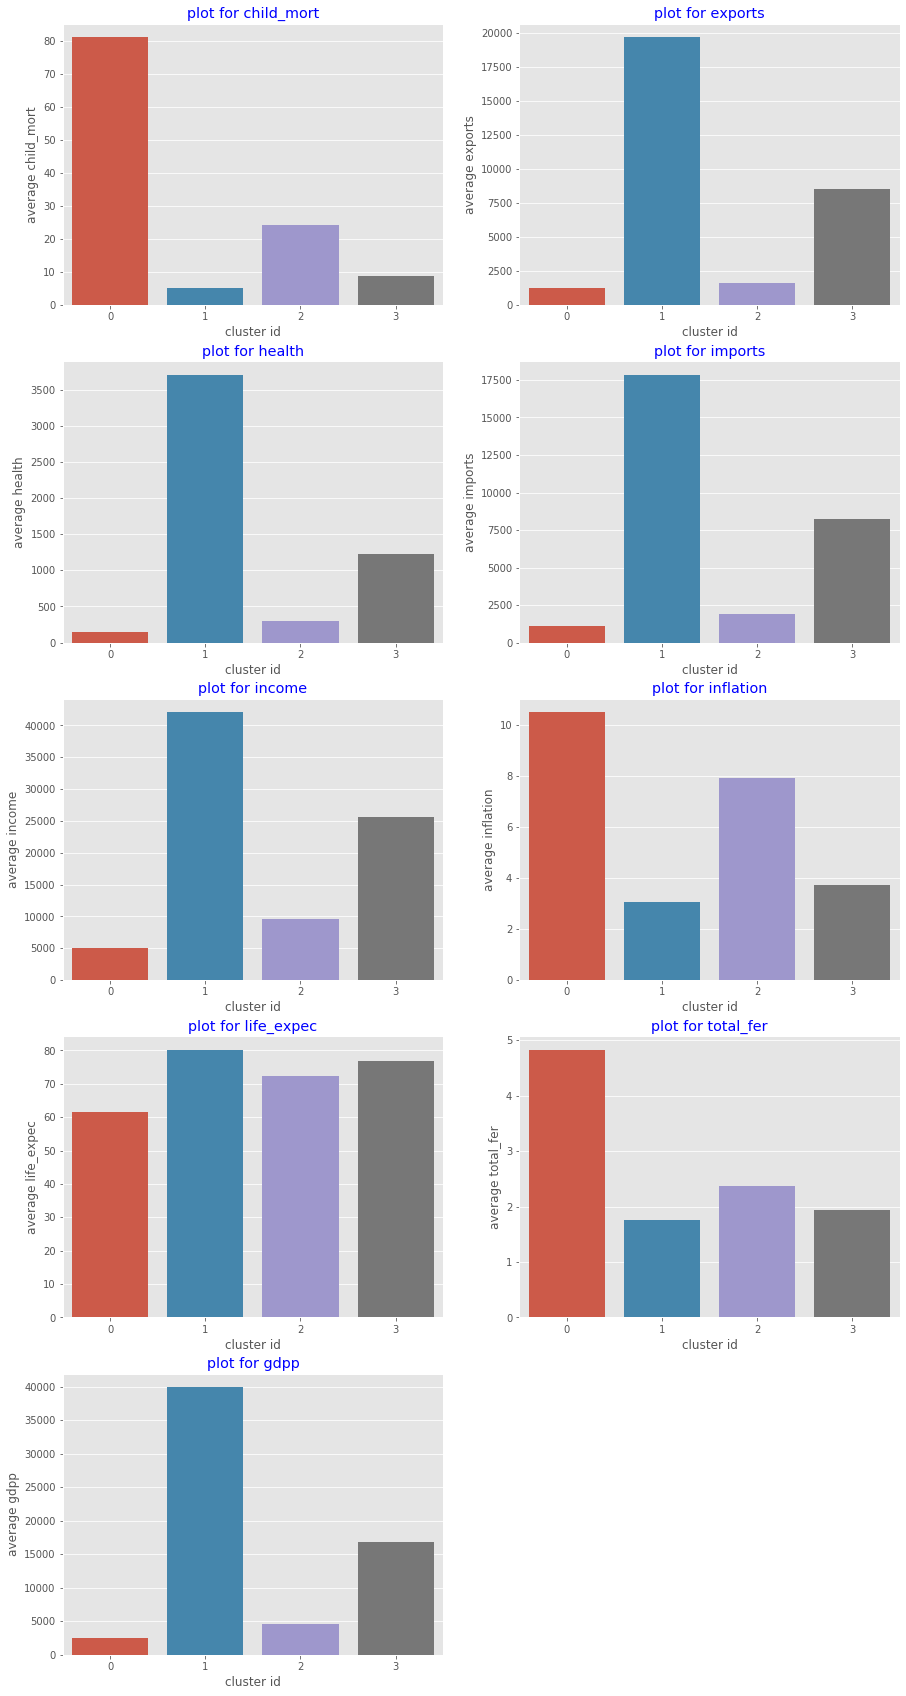

In [84]:
plt.figure(figsize=(15,30))
for i,col in enumerate(numerical_cols):
    plt.subplot(5,2,i+1)
    plt.title('plot for {0}'.format(col),color='blue')
    col_mean = kmeanscluster_df.groupby('kmeans_cluster_id')[col].mean().sort_values()
    x_list = list(col_mean.index)
    y_list = list(col_mean.round(2))
    sns.barplot(x=x_list,y=y_list);
    plt.xlabel('cluster id');
    plt.ylabel('average {0}'.format(col))

## Observations from above
- Average GDP per capita is highest for countries with cluster label 1 (39935.71) followed by labelled 3 countries (16832.27), labelled 2 countries (4615.22) and labelled 0 countries (2424.28)
    - This means countries with cluster label 1 are the developed countries while those with label 0 are under developed countries. Countries with label 2 and 3 are developing countries
- Average income is highest for countries with cluster label 1 (42078.57) followed by labelled 3 countries (25572.73), labelled 2 countries (9612.03) and labelled 0 countries (5058.44)
- Average inflation is highest for countries with cluster label 0 (10.50) followed by labelled 2 countries (7.93), labelled 3 countries (3.72), labelled 1 countries (3.06)
- Average child mortatlity rate is highest for countries with cluster label 0 (81.14) followed by labelled 2 countries (24.27), labelled 3 countries (8.79) , labelled 1 countries (5.29)
    - Countries with cluster label 0 (under developed countries) need more focus
- Average life expectancy is highest for countries with label 1 (80.24) while its lowest for labelled 0 countries (61.56)
    - Countries with cluster label 0 need more focus
- Average Fertility rate is highest for countries with label 0 (4.83) while its lowest for labelled 1 countries (1.75)
- Overall 
    - <b><font size=3 color='blue'>Label 0 countries on average with lowest GDP per capita, lowest income, lowest life expectancy, highest child mortality rate, highest fertlity rate need more focus for improvement</font></b>

average child_mort is highest for cluster id 0
average exports is highest for cluster id 1
average health is highest for cluster id 1
average imports is highest for cluster id 1
average income is highest for cluster id 1
average inflation is highest for cluster id 0
average life_expec is highest for cluster id 1
average total_fer is highest for cluster id 0
average gdpp is highest for cluster id 1


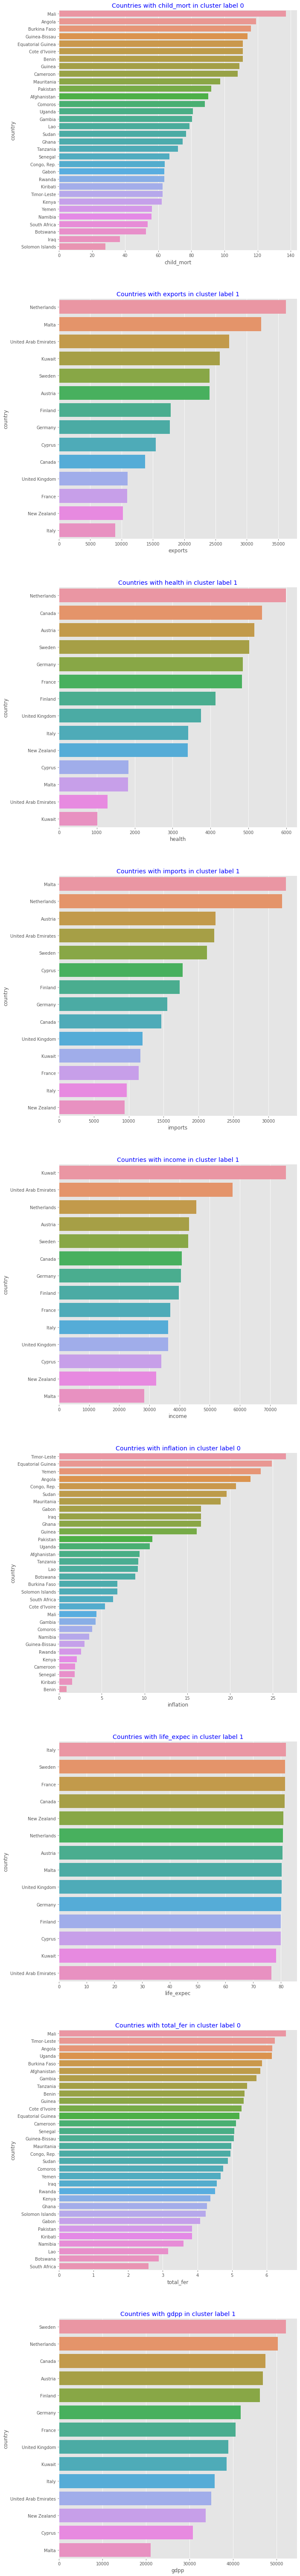

In [85]:
plt.figure(figsize=(10,110))
for i,col in enumerate(numerical_cols):
    plt.subplot(9,1,i+1)
    cluster_id = kmeanscluster_df.groupby('kmeans_cluster_id')[col].mean().sort_values(ascending=False).index[0]
    print('average {0} is highest for cluster id {1}'.format(col,cluster_id))
    plt.title('Countries with {0} in cluster label {1}'.format(col,cluster_id),color='blue')
    filter_df = kmeanscluster_df[
        kmeanscluster_df['kmeans_cluster_id']==cluster_id][['country',col]].sort_values(by=col,ascending=False)
    sns.barplot(y=filter_df['country'],x = filter_df[col].sort_values(ascending=False));

## Observations from above plot
- Above plot lists the top most countries with highest average value for various features 

# 12. List of countries that need more focus<a id='List Of Countries'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

- for that we will consider countries with high child mortality rate, low gdpp and low income
- such countries are in dire need of aid

In [86]:
## list of countries with high child mortality rate
cluster_id = kmeanscluster_df.groupby(
    'kmeans_cluster_id')['child_mort'].mean().sort_values(ascending=False).index[0]
child_mort_country_list = list(kmeanscluster_df[kmeanscluster_df['kmeans_cluster_id']==cluster_id]['country'])

print('number of countries with high child mortality rate: {0}'.format(len(child_mort_country_list)))

## list of countries with low gdpp
cluster_id = kmeanscluster_df.groupby(
    'kmeans_cluster_id')['gdpp'].mean().sort_values(ascending=True).index[0]
gdpp_country_list = list(kmeanscluster_df[kmeanscluster_df['kmeans_cluster_id']==cluster_id]['country'])

print('number of countries with low gdpp: {0}'.format(len(gdpp_country_list)))

## list of countries with low income
cluster_id = kmeanscluster_df.groupby(
    'kmeans_cluster_id')['income'].mean().sort_values(ascending=True).index[0]
income_country_list = list(kmeanscluster_df[kmeanscluster_df['kmeans_cluster_id']==cluster_id]['country'])

print('number of countries with low income: {0}'.format(len(income_country_list)))

kmeans_common_countries = [country for country in child_mort_country_list 
                    if country in gdpp_country_list and 
                    country in income_country_list]

print('\nnumber of countries that need aid: {0}'.format(len(kmeans_common_countries)))
print('\nlist of such countries: \n{0}'.format(kmeans_common_countries))


number of countries with high child mortality rate: 32
number of countries with low gdpp: 32
number of countries with low income: 32

number of countries that need aid: 32

list of such countries: 
['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Cameroon', 'Comoros', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Mali', 'Mauritania', 'Namibia', 'Pakistan', 'Rwanda', 'Senegal', 'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Uganda', 'Yemen']


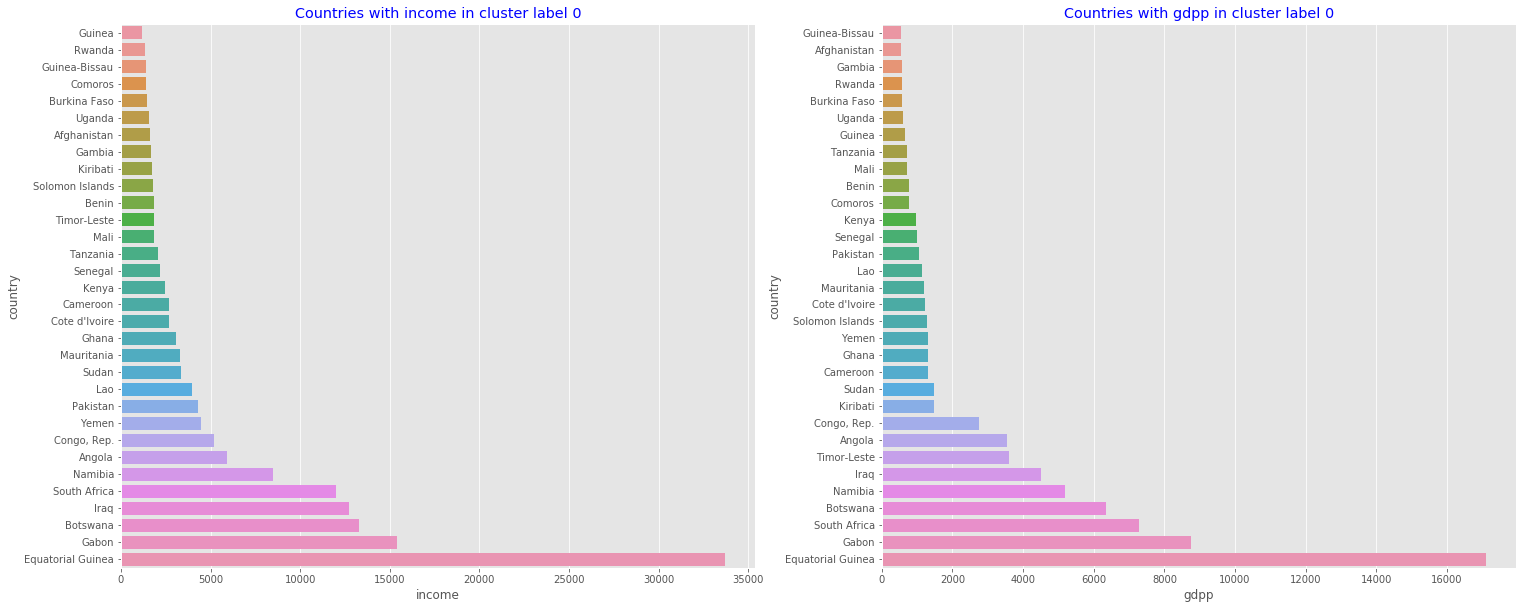

In [87]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
col='income'
cluster_id = 0
plt.title('Countries with {0} in cluster label {1}'.format(col,cluster_id),color='blue')
filter_df = kmeanscluster_df[
    kmeanscluster_df['kmeans_cluster_id']==0][['country',col]].sort_values(by=col,ascending=True)
sns.barplot(y=filter_df['country'],x = filter_df[col].sort_values(ascending=True));

plt.subplot(1,2,2)
col='gdpp'
plt.title('Countries with {0} in cluster label {1}'.format(col,cluster_id),color='blue')
filter_df = kmeanscluster_df[
    kmeanscluster_df['kmeans_cluster_id']==0][['country',col]].sort_values(by=col,ascending=True)
sns.barplot(y=filter_df['country'],x = filter_df[col].sort_values(ascending=True));

# 13. Conclusion and Recommendations<a id='Conclusion and Recommendations'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

### List of countries from hierarchicl clustering that need focus

In [88]:
print('Total number of countries that are in direst need of aid from hierarchical clustering: {0}'
      .format(len(hir_common_countries)))
print('List of such countries: \n{0}'.format(hir_common_countries))
print('Total number of countries that are in direst need of aid from k-means clustering: {0}'
      .format(len(kmeans_common_countries)))
print('List of such countries: \n{0}'.format(kmeans_common_countries))

Total number of countries that are in direst need of aid from hierarchical clustering: 34
List of such countries: 
['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Cameroon', 'Comoros', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'India', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Mali', 'Mauritania', 'Mongolia', 'Namibia', 'Pakistan', 'Rwanda', 'Senegal', 'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Uganda', 'Yemen']
Total number of countries that are in direst need of aid from k-means clustering: 32
List of such countries: 
['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Cameroon', 'Comoros', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Mali', 'Mauritania', 'Namibia', 'Pakistan', 'Rwanda', 'Senegal', 'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', '

### Lets plot these countries from different type of clustering

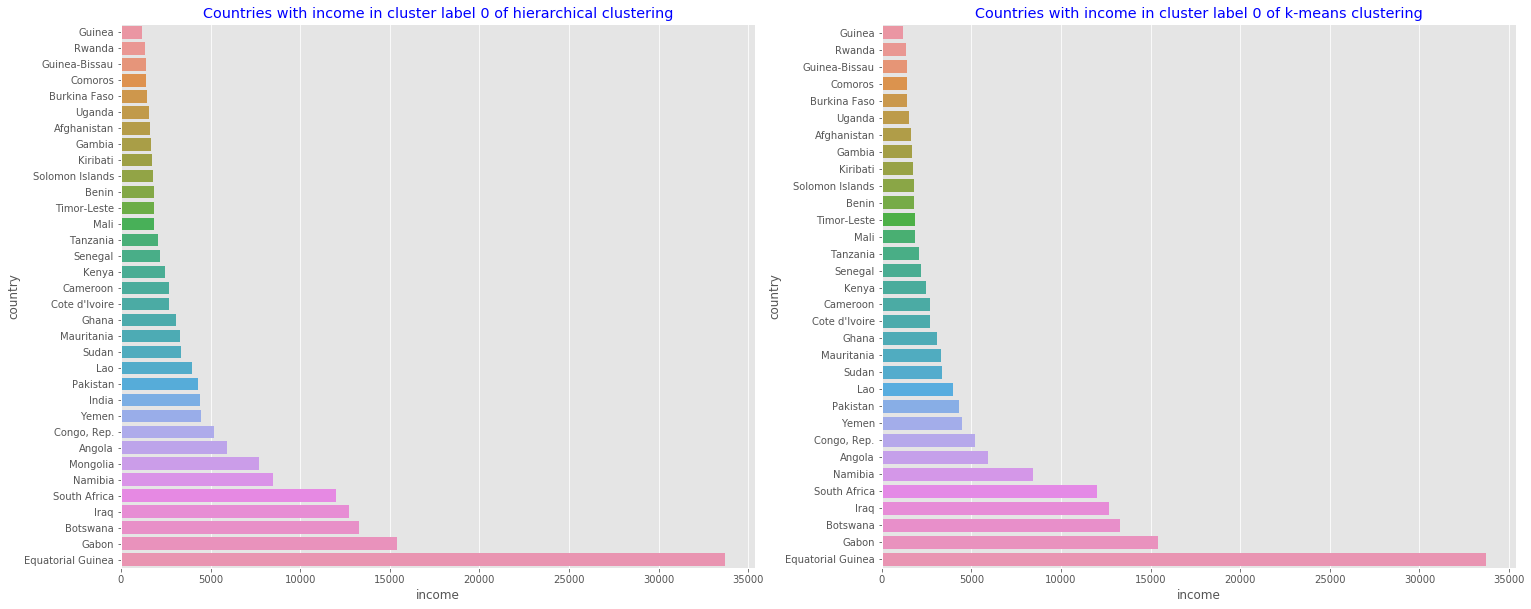

In [89]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
col='income'
cluster_id = 0
plt.title('Countries with {0} in cluster label {1} of hierarchical clustering'.format(col,cluster_id),color='blue')
filter_df = hiercluster_df[
    hiercluster_df['hir_cluster_id']==0][['country',col]].sort_values(by=col,ascending=True)
sns.barplot(y=filter_df['country'],x = filter_df[col].sort_values(ascending=True));

plt.subplot(1,2,2)
col='income'
plt.title('Countries with {0} in cluster label {1} of k-means clustering'.format(col,cluster_id),color='blue')
filter_df = kmeanscluster_df[
    kmeanscluster_df['kmeans_cluster_id']==0][['country',col]].sort_values(by=col,ascending=True)
sns.barplot(y=filter_df['country'],x = filter_df[col].sort_values(ascending=True));

## Thus we conclude that the list of countries from hiearchical clustering and k-means clustering is almost same and we recommend that countries with label 0 are in direst need of aid and need more focus